# **Introduction to probabilistic thinking for neuroscience & machine learning**

![imbizo logo](https://imbizo.africa/images/imbizo_invert.png)

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Probabilistic_Thinking_and_Programming/Probabilistic_Thinking_and_Programming_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> 

© Imbizo 2024. Apache License 2.0.

**Author:** Kira Düsterwald

**Acknowledgements:** A lot of this practical is built off the 2023 Deep Learning Indaba Probalistic Thinking Practical, which was co-developed with Elizaveta Semenova (Imperial College London) and James Allingham (Google DeepMind). The original practical is available [on collab here]("https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Introduction_to_Probabilistic_Thinking_and_Programming.ipynb").

In [61]:
#TODO: update collab link, licence?
#TODO: update outline

## **Welcome**

**Introduction:**

Probabilistic thinking and working with probability distributions are very powerful tools for any theoretical neuroscientist or machine learner (honestly, any _person_ navigating the world).

In this practical in three parts, we'll cover probability theory, Bayesian inference harnessing some probabilistic programming techniques, and dimensionality reduction for neuroscience.

## Part 1: probability theory and random variables

The first part (which is where you are at the moment!) is all about probability distributions and random variables. With this foundational knowledge in place, you can move on to our second part, which centres on Bayesian reasoning.

Within each part, we have labelled the sections by the amount of prior knowledge they assume, namely, as 'Beginner', 'Intermediate' and 'Advanced'.

Feel welcome to step in and out of each section and follow your curiosity as you move through the prac!

**Topics:**

Content: <font color='red'>`Bayesian Probability`</font>, <font color='purple'>`Probabilistic Programming`</font>
Level: <font color='blue'>`Beginner`</font>


**Prerequisites:**

* Basic machine learning (e.g., understanding supervised and unsupervised learning)
* Basic calculus (e.g., computing an integral and taking derivatives to solve min/max optimisation problems)
* Python programming (with `numpy` -- and you'll learn some `jax` along the way!)

**Outline:**

>[Introduction to Probabilistic Thinking and Programming (Part 1)](#scrollTo=oXhUKM4pmkGc)

>>[Welcome](#scrollTo=f80Wj_FP_3Oi)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>>[Probabilistic Foundations 🎲](#scrollTo=ZNlT8E41STXX)

>>>[So what is a random variable?](#scrollTo=ZNlT8E41STXX)

>>>[What about a probability distribution?](#scrollTo=ZNlT8E41STXX)

>>>[🔧 Group Task (A1)](#scrollTo=y49yYWn9jNNo)

>>>>[💡 Answer (A1)](#scrollTo=stTC94rWjNNp)

>>>[A Word on Notation...](#scrollTo=G_ywY52HjNNp)

>>>[The Bernoulli Distribution](#scrollTo=5czMPIKY2c2y)

>>>[🔧 Group Task (A2)](#scrollTo=1uA5fHb7jNNs)

>>>>[💡 Answer (A2)](#scrollTo=1Rz5eM0wjNNs)

>>>[The Categorical Distribution](#scrollTo=4LDwuZo4dy_h)

>>>[🔧 Group Task (A3)](#scrollTo=fvSdyJGjjNNu)

>>[⭐ Continuous Distributions](#scrollTo=n4jF-YFRjNNu)

>>>[The (Continuous) Uniform Distribution](#scrollTo=q95K-YzwjNNv)

>>>[The Normal Distribution](#scrollTo=36pozJ3WjNNv)

>>>>[🔧 Group Task (A4)](#scrollTo=PPi_zdZvjNNv)

>>>>>[💡 Answer (A4)](#scrollTo=tVF4DYlwjNNw)

>>>>[🤖 Code Task 1](#scrollTo=9yDor7iBjNNw)

>>>>>[☑️ Test your code](#scrollTo=qRCmykCajNNw)

>>>>>[💡 Answer (Code Task 1)](#scrollTo=U5Dfv5pBjNNw)

>>>[Expected Values](#scrollTo=W2okU56XjNNx)

>>>>[🔧 Group Task (A5)](#scrollTo=3CRsh-jBjNNx)

>>>>>[💡 Answer (A5)](#scrollTo=tago3IP_jNNx)

>>>[Computing Expected Values: Monte Carlo Estimation](#scrollTo=eanqiQ7OjNNx)

>>>>[🔧 Group Task (A6)](#scrollTo=unrnfv9mjNNy)

>>>>>[💡 Answer (A6)](#scrollTo=_Xtk0QDXjNNy)

>>>[The Beta Distribution](#scrollTo=0-VJPjKuldUF)

>>[⭐ Multivariate Distributions](#scrollTo=Eb2y5gw9dz3v)

>>>[The Multivariate Normal Distribution](#scrollTo=-CE_lldLjNNz)

>>>[Relationships between Variables](#scrollTo=-CE_lldLjNNz)

>>>[The Sum and Product Rules](#scrollTo=AdSfc6AEdz3y)

>>>>[Marginal Distributions & the Sum Rule](#scrollTo=f3UcJLfUjaLu)

>>>>[🔧 Group Task (A7)](#scrollTo=unm-tsT6qnV6)

>>>>>[💡 Answer (A7)](#scrollTo=HI_WYP24qrqJ)

>>>>[Conditional Distributions & the Product Rule](#scrollTo=iDqcvQ8doA-j)

>>>>[🔧 Group Task (A8)](#scrollTo=efd0aIqOjNN1)

>>>>>[💡 Answer (A8)](#scrollTo=qQ6oiwbgwBU9)

>>[🤖 Numpyro: Batch and Event Shapes](#scrollTo=5dnSEOspdz32)

>>[➡️ Next Steps...](#scrollTo=XsuEf7hgjNN4)

**Before you start:**

Note for this practical you, do not need to use a GPU or TPU, so feel free to use a CPU runtime: "Runtime" > "Change runtime type" > "CPU".

**Important:** you will also need to go to "Tools" > "Settings" > "Miscellaneous" > check "Kitty Mode".

**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | I've never worked with probability distributions before. |
`Intermediate`  | I'm somewhat comfortable with probability distributions, but I don't know about Bayesian inference. |
`Advanced`      | I'm a Bayesian at heart, but I want to know how to do it more easily! |

## **Installation and Imports**

Run the following cells to set up our working environment and helper functions.

In [109]:
## Install and import anything required. Capture hides the output from the cell.

# !pip install numpyro
# !pip install seaborn
# !pip install google

# from jax import random
# import jax.numpy as jnp

# import numpyro
# numpyro.enable_validation()

# # ^ This allows numpyro to check e.g., if x is in the domain of a uniform dist.
# # Since speed isn't a requirement for a tutorial, let's keep it on.
# import numpyro.distributions as dist
# from numpyro.infer import Predictive, init_to_median, MCMC, NUTS
# from numpyro.diagnostics import hpdi

import numpy as np
from scipy.stats import gaussian_kde
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

# adapts colours for theme
# from google import colab
# is_dark = colab.output.eval_js('document.documentElement.matches("[theme=dark]")')

is_dark = True

if(is_dark):
  prior_col = 'yellow'
  post_col = 'cyan'
  like_col = 'pink'
else:
  prior_col = 'purple'
  post_col = 'gray'
  like_col = 'teal'

Python(22850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [63]:
# Helper Functions. (Run Cell)

def Gaussian_conditional(mean, cov, x=None,y=None):
  assert not (x is None and y is None) and not (x is not None and y is not None)
  if x is not None:
    var = cov[1,1] -  cov[1,0] * cov[0,0] ** (-1) * cov[0,1]
    mu = mean[1] + cov[1,0] * cov[0,0] ** (-1) * (x - mean[0])
  else:
    var = cov[0,0] -  cov[0,1] * cov[1,1] ** (-1) * cov[1,0]
    mu = mean[0] + cov[0,1] * cov[1,1] ** (-1) * (y - mean[1])
  return mu, var**0.5

def plot_log_gaussian_ellipse(ax, mean, cov, color='b', alpha=1, lw=1, label=None, MAP_size=5, std_levels=[1, 2, 4, 6]):

  eigenvalues, eigenvectors = np.linalg.eigh(cov)
  theta = np.linspace(0, 2*np.pi, 1200);
  std_ellipsis = (np.sqrt(eigenvalues[None,:]) * eigenvectors) @ np.stack([np.sin(theta), np.cos(theta)])

  artists = []

  for level in std_levels:
    artists.append(ax.plot(mean[0] + level*std_ellipsis[0,:],
                           mean[1] + level*std_ellipsis[1,:], c=color,
                           alpha=alpha, lw=lw))

  artists.append(ax.scatter([mean[0]], [mean[1]], MAP_size, color=color,
                            label=label, alpha=alpha, marker='x'))

  return artists

In [65]:
# since we want reproducible results, we will introduce a random seed/key:
rng = np.random.seed(42)

## **Part 1: Probabilistic foundations 🎲**

In the world of probabilistic thinking and programming, we first need to build some **important foundations**.

In particular, we will need to understand what a **probability distribution** is, some simple but fundamental rules of probability, and how to interact with probabilities in code.

**Probability distributions** and **random variables** allow us to describe (and do calculations about) events with random outcomes. One example might be flipping a coin or rolling a die. In the first case, the possible outcomes are *heads* or *tails*.

### ***So what is a random variable?***

A **random variable** $X$ allows us to assign numerical values to the possible outcomes of a random event. For example, in the coin flipping example, we could use a binary random variable with $X = 1$ if the coin is heads and $X = 0$ for tails.

### ***What about a probability distribution?***

A **probability distribution** $p(X = x)$ describes the probability that $X$ takes each of its possible values $x$.

### **🔧 Group Task (A1)**

*Find a friend and discuss ...* 🤝


*   Using the possible outcomes of rolling a die as a springboard, what are some other examples of random events?
*   What are their possible outcomes?
* What kind of distribution might be helpful to model these scenarios.

#### 💡 **Answer (A1)**

Assuming that a die has six sides, the outcomes are ⚀, ⚁, ⚂, ⚃, ⚄, and ⚅.

While there are many possible answers for what distribution could model this random event, here is one option:

$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$

### **A Word on Notation...**

We will soon see a lot of new notation, so let's spend a little more time to make sure that everything is clear before moving on. If you are new to this topic or have seen some of it before but are confused by the way we've written things, then give this section a read.

**$X$ vs $x$**

* $X$ represents a random variable, that is, a variable that could take on several different values depending on the outcome of some random event.
* $x$ represents a particular value that $X$ could take. You can think of $x$ much like a python variable `x`, which at any time has a single value.
* One way of deciding whether to write $X$ or $x$ is to ask the question, "Is the value of the variable known?". If the answer is yes, then we write $x$. If the answer is no, then we write $X$.

**$p(X = x)$ vs $p(X)$ vs $p(x)$**

* $p(X)$ is a shorthand that means the same thing as $p(X = x)$, i.e., it represents the PMF/PDF of a random variable $X$.
* $p(x)$ has a slightly different meaning. It signifies the probability of the random variable $X$ taking the value $x$. Instead of representing the PDF, it represents the PDF evaluated at $x$. It is a probability *value* rather than a function.
* You might also see the notation $p_X(x)$, which has the same meaning as $p(x)$, but includes the random variable $X$ for clarity. If we write $p_X(1)$ we can still see that the random variable is $X$.


**$p$ vs $P$**

* Sometimes, you may see notation that uses both $p$ and $P$. In this case, $P$ and $p$ are being used to differentiate between distributions for *discrete* and *continuous* random variables, respectively.
* You may also see other notations such as $\text{Pr}$ or $\mathbb{P}$. These don't have any special meaning unless otherwise mentioned in the text where they appear.

### **The Bernoulli Distribution**

A Bernoulli distribution is used to describe random events with two possible outcomes e.g. when we have a random variable $X$ that takes on one of two values $x \in \{0, 1\}$:
\begin{align}
p(X = 1) &= p \\
p(X = 0) &= 1 - p
\end{align}
where $0 \le p \le 1$. Here $p$ is a parameter that controls the probability of each outcome. For example, in the case of a *fair* coin toss, $p = 0.5$ so that both outcomes have a 50\% chance of occurring. As we will see shortly, most distributions have multiple parameters.

A probability distribution can be uniquely defined by its probability mass function (PMF), or probability density function (PDF) in the case of continuous distributions. For the Bernoulli distribution, we write the PMF as
\begin{align}
p(X = x) = \text{Bernoulli}(X\mid p) &= \begin{cases}
p\, & \text{if } x = 1 \\
1 - p\, & \text{if } x = 0
& \end{cases} \\
&= p^x(1-p)^{1-x}.
\end{align}

**Exercise:** convince yourself that the two definitions of the Bernoulli distribution shown above are equivalent.

Now let's construct a Bernoulli distribution in code so that we can play around with it and get some intuition. In `numpy`, there isn't a direct Bernoulli distribution, so we'll use a Binomial distribution - the generalisation of Bernoulli. More on this soon!

**Note:** In this practical, we are going to use `scipy.stats` to construct our distributions. However, there are several other `jax` packages that work similarly (e.g., `distrax`) as well as several options for `tensorflow` (e.g., `tensorflow_probability`), `pytorch` (e.g., `torch.distribution`) and standalone modules (e.g. `numpyro`).

In [49]:
p = np.array(0.5)
bernoulli = stats.bernoulli

# each re-run of this block will generate a new random number, according to the probability p! Try re-run it a couple of times and see what you get.
sample = bernoulli.rvs(p)
print(sample)

0


We can also evaluate the probability of observing a sample.

**Note:** the distribution objects in `scipy.stats` (and indeed most other libraries for probability distributions) return *log*-probabilities rather than raw probabilities. This means that we need to take the exponent if we want to know the probability.

In [66]:
log_prob = bernoulli.logpmf(sample,p)
print(f"log p(X = {sample}) = {log_prob}")
print(f"p(X = {sample}) = {np.exp(log_prob)}")

log p(X = 0) = -0.3011050927839216
p(X = 0) = 0.74


As expected, we get a probability of 0.5.

We can also easily get **multiple samples**:

In [55]:
#{ run: "auto" }
n = 5 #@param {type:"slider", min:1, max:10, step:1}
samples = bernoulli.rvs(p, size=(n,), random_state=rng)
print(samples)

[0 0 0 0 1]


*But what if we wanted to evaluate the probability of observing all of our samples?*

The `bernoulli` object we created earlier treats each sample individually and returns the probabilities of observing each sample on its own:

In [56]:
individual_sample_probs = np.exp(bernoulli.logpmf(samples,p))
print(individual_sample_probs)

[0.5 0.5 0.5 0.5 0.5]


But, we can use one of the laws of probability to compute the probability of observing all of the samples together:
$$
p(X_1=x_1, X_2=x_2, \dots, X_N=x_n) = \prod_{n=1}^N p(X_n=x_n).
$$
This is called the *product rule of probability*, and it says that for *independent* random variables, the joint probability (i.e., the probability of observing them all together) is equal to the product of the individual probabilities.

Now, let's calculate the joint probability of our samples.

In [57]:
joint_prob = np.prod(individual_sample_probs)
print(joint_prob)

0.03125


### **🔧 Group Task (A2)**

* Why do you think that libraries usually return *log*-probabilities?
* Play with the following slider. How does changing parameter $p$ affect the Bernoulli distribution?

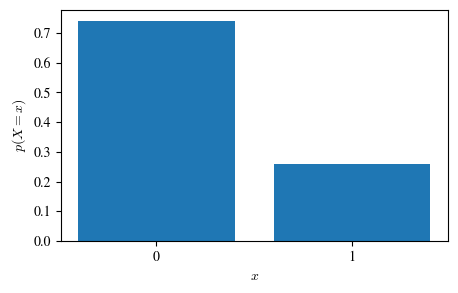

In [60]:
# Bernoulli distribution interactive excercise { run: "auto" }

p = 0.26 #@param {type:"slider", min:0, max:1, step:0.01}

n = 1000
samples = bernoulli.rvs(p, size=(n,), random_state=rng)

num_ones = (samples == 1.).sum()
num_zeros = (samples == 0.).sum()

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar([0, 1], [num_zeros/n, num_ones/n])
ax.set_xticks([0, 1])
ax.set_xlabel('$x$')
ax.set_ylabel('$p(X=x)$')
plt.show()

#### 💡 **Answer (A2)**


The answer, as is often the case, is numerical stability! When working with numbers between 0 and 1 (i.e., probabilities), it is easy to run into *underflow*. Underflow is when a number that is very close to zero gets rounded to become *exactly* zero because the amount of memory used to represent it is not enough to maintain accuracy.

For example, consider computing the probability of several independent events $A$, $B$, $C$, $\ldots$:
$$
p(A, B, C, \ldots) = p(A) \times p(B) \times p(C) \times \ldots,
$$
because we are multiplying numbers that are between 0 and 1, we know that the result will be smaller for each multiplication. As we perform more and more multiplications, it becomes more likely that the computation will underflow and erroneously produce a result of 0.

We can avoid this problem by instead working with log-probabilities. Continuing the above example, we get
$$
\log p(A, B, C, \ldots) = \log p(A) + \log p(B) + \log p(C) + \ldots,
$$
where by the log laws, we have replaced all of the multiplications with additions, thereby avoiding any numerical issues. This is because numbers that are very close to zero become large negative numbers when you apply the log function. e.g. $\log_{10}(0.0000001) = -16.1181$. Adding these larger log probabilities (= multiplying probabilities) will preserve accuracy for longer and so avoids the risk we will accidentally round the corresponding probabilities to zero.

### **The Categorical Distribution**

A categorical distribution is used to model random events with multiple *discrete* outcomes, such as the die-rolling event from above. By discrete, we mean that there is a finite number of outcomes. We will tackle continuous outcomes – e.g., a value like temperature that is modeled by a real numbers – shortly.

As with the Bernoulli distribution, we can characterise the categorical distribution with its PMF:
\begin{align}
p(X = x) = \text{categorical}(X\mid\mathbf{p}) = \prod_{k=1}^K p_k^{[x=k]},
\end{align}
where $K$ is the number of outcomes, $\textbf{p} = [p_1, p_2, \dots, p_K]$, $p_k$ is the probability of the $k^{th}$ outcome, $\sum_k p_k = 1$, and $[x = k]$ is called an Iverson bracket which evaluates to 1 if $x = k$ and 0 otherwise.

**Try this out:** Convince yourself that a categorical distribution with $K = 2$ is equivalent to a Bernoulli distribution.

Now, let's start playing with this distribution in code!

In [77]:
ps = np.array([0.1, 0.2, 0.3, 0.4])
categorical = stats.multinomial(n=1, p=ps)

As before we can take some samples:

In [85]:
samples = categorical.rvs(size=(10,), random_state=rng)
print(samples)

## note that we get samples indexed in an array! How can we change this to something more interpretable?
samples = np.argmax(categorical.rvs(size=(10,), random_state=rng), axis = 1)
print(samples)

[[0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]]
[0 2 3 2 0 3 1 1 3 3]


And compute the probability for each of the random events:

In [84]:
print(f"p(X=0) = {np.exp(categorical.logpmf([1, 0, 0, 0])):.1f}")
print(f"p(X=1) = {np.exp(categorical.logpmf([0, 1, 0, 0])):.1f}")
print(f"p(X=2) = {np.exp(categorical.logpmf([0, 0, 1, 0])):.1f}")
print(f"p(X=3) = {np.exp(categorical.logpmf([0, 0, 0, 1])):.1f}")

p(X=0) = 0.1
p(X=1) = 0.2
p(X=2) = 0.3
p(X=3) = 0.4


### 🔧 **Group Task (A3)**

Play with the following sliders, which control the parameters of the categorical distribution. Note that because $\sum_k p_k = 1$, we are using an alternative way to represent the categorical distribution. Instead of specifying the probabilities $p_k$, we specify logits $l_k$. Each $p_k$ is then computed as
$$
p_k = \frac{\exp(l_k)}{\sum_{k'}\exp(l_k)},
$$
i.e., using the softmax function.

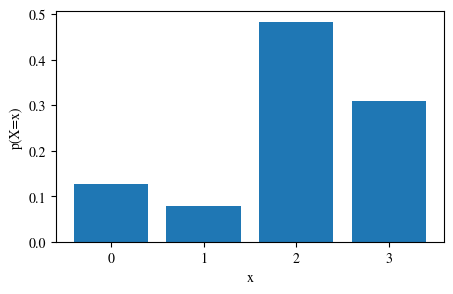

In [90]:
# Categorical distribution interactive excercise {run: "auto"}
l_0 = 0.7 #@param {type:"slider", max:4, step:0.1}
l_1 = 0.3 #@param {type:"slider", max:4, step:0.1}
l_2 = 2 #@param {type:"slider", max:4, step:0.1}
l_3 = 1.6 #@param {type:"slider", max:4, step:0.1}

logits = np.exp(np.array([l_0, l_1, l_2, l_3], dtype=np.float32))
logits = logits / np.sum(logits)

categorical = stats.multinomial(n=1, p=logits)
samples = np.argmax(categorical.rvs(size=(1000,), random_state=rng), axis=1)

values =[0, 1, 2, 3]
hist, _ = np.histogram(
    samples, bins=np.array(values + [4]), density=True
)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.bar(values, hist)
ax.set_xticks(values)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

## ⭐ **Continuous Distributions**

So far, we have considered categorical distributions as a way to model random events with a finite number of possible outcomes. However, many real-world probabilistic questions consider events with an uncountable number of outcomes.

Consider the following application areas and the random variables they might model:

* **Climate modelling**: Temperature, atmospheric pressure, other barometric variables.
* **Population studies**: Demographic information (height, weight, etc.)
* **Finance and Economics:** Stock prices, interest rates, market indices.
* **Engineering:** Material strength, failure times of components, signal noise.
* **Medicine and Health Sciences:** Blood pressure, cholesterol levels, survival times.

You've likely already noticed that these values all fall along the continuous number spectrum. Random variables like these are called *continuous random variables**, and are best modelled using **continuous distributions**. Let's have a look at some of them!

### **The (Continuous) Uniform Distribution**

Let's have a look at arguably one of the most straightforward continuous distributions: the uniform distribution. Under this distribution, all possible values are equally likely.

The uniform distribution has the following form
$$
p(X = x) = \mathrm{Uniform}(x\mid a, b) = \begin{cases}
\frac{1}{b - a}\, & \text{if } a \le x \le b \\
0\, & \text{otherwise},
\end{cases}
$$
where $a$ and $b$ are the upper and lower bound parameters, respectively.

As has been our custom, here is an interactive plot of the distribution if you'd like to get a better picture.

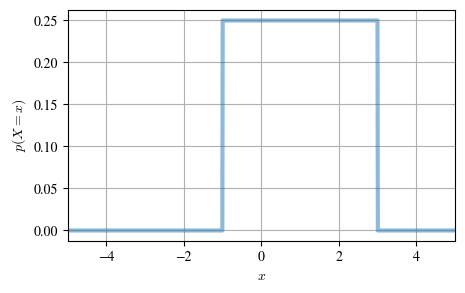

In [96]:
# Plotting the (continuous) uniform distribution {run: "auto"}
#@markdown Note: `a` must be smaller than `b`.
a = -1 #@param {type:"slider", min:-5, max:5, step:0.1}
b = 3 #@param {type:"slider", min:-5, max:5, step:0.1}

uniform = stats.uniform(loc=a,scale=b-a)
xs = np.linspace(-5, 5, 1000)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, np.exp(uniform.logpdf(xs)), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(X=x)$')
ax.grid(0.3)
ax.set_xlim(-5, 5)
plt.show()

### **The Normal Distribution**

The normal – also known as Gaussian – distribution is one of the most common distributions for modeling *continuous* random variables. Its probability density function is
$$
p(X = x) = \mathcal{N}(x\mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(\mu - x)^2}{2\sigma^2}\right),
$$
where $\mu$ and $\sigma$ are the *mean* and *standard deviation* (also called the location, and scale or square-root of the *variance* $\sigma^2$, respectively).

Once again, the best way to get a sense for this distribution is to play with some code!

#### 🔧 **Group Task (A4)**

* Play with the following sliders. How do the mean and standard deviation affect the samples?

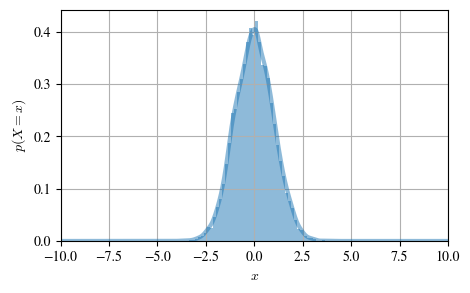

In [98]:
# Normal distribution interactive excercise {run: "auto"}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", max:4, step:0.1}

normal = stats.norm(loc=μ, scale=σ)
samples = normal.rvs(size=(10000,), random_state=rng)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.hist(samples, bins=50, density=True, alpha=0.5)
x = np.linspace(-10, 10, 3000)
kde = gaussian_kde(samples)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(X=x)$')
ax.set_xlim(-10, 10)
ax.grid(0.3)
plt.show()


##### 💡 **Answer (A4)**
The mean controls where the center of the distribution is located. In other words, it controls where the most likely *location* to sample a value is.

The standard deviation controls how wide the distribution is. In other words, it controls how likely we are to draw samples farther away from the mean.

#### 🤖 **Code Task 1**

* Fill in the code below to define a PDF for the normal distribution, using functions from `numpy`.

 *Hint:* You may want to use `np.pi`, `np.sqrt`, and `np.exp`.

In [102]:
# Code Task (1): Implementing the normal PDF from scratch!
def normal_pdf(loc, scale, x):
   # p_x =  # TODO: your code goes here!
    return p_x

##### ☑️ **Test your code**

In [103]:
def test_normal_pdf(pdf_fn):
  assert pdf_fn(0, 1, 0) == np.exp(stats.norm(loc=0, scale=1).logpdf(0)), "Normal(X=0|0, 1) is incorrect."
  assert pdf_fn(0, 2, 0) == np.exp(stats.norm(loc=0, scale=2).logpdf(0)), "Normal(X=0|0, 2) is incorrect."
  assert pdf_fn(0, 1, 1) == np.exp(stats.norm(loc=0, scale=1).logpdf(1)), "Normal(X=0|1, 1) is incorrect."
  assert pdf_fn(2, 3, 1) == np.exp(stats.norm(loc=2, scale=3).logpdf(1)), "Normal(X=1|2, 3) is incorrect."
  print("Nice! Your answer looks correct.")

test_normal_pdf(normal_pdf)

Nice! Your answer looks correct.


### **Expected Values**

The expected value of a random variable is the value that we expect to get on average when we sample a large number of different outcomes from the random event.

For example, if we consider our example of flipping a coin from above, where $X = 1$ if the coin lands on heads and $X = 0$ if the coin lands on tails, then intuitively the expected value is $0.5$. To see this, think about a game where you get 1 coin for heads and no coins for tails. If you play a thousand games, you should expect to get about $500$ coins in total. So your expected profit from a single match is $500/1000 = 0.5$ coins.

More precisely, we can write the expected value as
$$
\mathbb{E}[X] = \sum_x x \cdot p(X=x),
$$
for a discrete random variable $X$ or
$$
\mathbb{E}[X] = \int x \cdot p(X=x) \mathrm{d}x,
$$
for a continuous random variable. From this definition, we can think of the expected value as a weighted average of all of the values of $X$, where the weighting for each value is the probability of observing it.

**$E$ vs $\mathrm{E}$ vs $\mathbb{E}$**

* You may also have seen a variety of notations for expected values ($E$, $\mathrm{E}$, $\mathbb{E}$) and variances ($V$, $\mathrm{V}$, $\mathbb{V}$, $\text{Var}$). Don't worry, all of these share the exact same meaning.

We can also calculate expected values of functions that take random variables as inputs. For example, the variance of a random variable can be calculated using the following expected value
$$
\mathbb{V}[X] = \mathbb{E}[(X - \mu)^2],
$$
where $\mu = \mathbb{E}[X]$ is the mean, as described above.

#### 🔧 **Group Task (A5)**

* Can you compute the expected value for rolling a six-sided die?

##### 💡 **Answer (A5)**

Assuming that we use the following random variable to represent our die throw
$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$
the expected value is
$$
\mathbb{E}[X] = \frac{1}{6} \cdot 1 + \frac{1}{6} \cdot 2 + \frac{1}{6} \cdot 3 + \frac{1}{6} \cdot 4 + \frac{1}{6} \cdot 5 + \frac{1}{6} \cdot 6 = 3.5.
$$

### **Computing Expected Values: Monte Carlo Estimation**

Instead of computing an expected value exactly, we can estimate it using a *Monte Carlo* approximation.  We can describe this procedure using the following mathematical notation:
$$
\mathbb{E}[X] \approx \frac{1}{N} \sum_{n=1}^{N} x_n\,, \quad x_n \sim p(X).
$$
That is, we sample $N$ values $x_n$ from $p(X)$ and then take the average. Because the values appear proportionally to their probabilities, the larger $N$, the more accurate the estimation will become.

We can also implement this in code, and calculate the expected value of the normal distribution $\mathcal{N}(x \mid \mu, \sigma)$.


#### 🔧 **Group Task (A6)**

Play with the sliders...

1. Start with a large value for $N$ and a small value for $\sigma$, what number does the expected value approximate? *Hint:* change the value of $\mu$ and see what happens to the expected value.
2. Now, start decreasing $N$ and/or increasing $\sigma$. What happens to the expected value?
3. What notation in the equation above do lines 7 and 9 in the code below correspond to?


In [105]:
# Expected value interactive excercise {run: "auto"}
N = 100 #@param {type:"slider", min:1, max:400, step:1}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}

normal = stats.norm(loc=μ, scale=σ)
samples = normal.rvs(size=(N,), random_state=rng)

expected_value = np.sum(samples) / N

print(f'E[X] = {expected_value:.5f}')

E[X] = 0.05837


##### 💡 **Answer (A6)**


1. The expected value for a random variable with a normal distribution is the mean parameter $\mu$. For this reason the term *mean* is often used synonymously with *expected value*.
2. As we decrease $N$ and/or increase $\sigma$, the Monte Carlo approximation becomes less accurate. **Fun fact**: for a standard Monte Carlo approximator such as this, the approximation error decreases at a rate of $\sqrt{N}$. In other words, if we multiply $N$ by 4, the error in the approximation should be divided by 2.

#### Functions of random variables

We can also calculate expected values of functions that take random variables as inputs. For example, the variance of a random variable can be calculated using the following expected value
$$
\mathbb{V}[X] = \mathbb{E}[(X - \mu)^2],
$$
where $\mu = \mathbb{E}[X]$ is the mean, as described above.

In [113]:
#@title Estimating the variance - <font color='orange'>`Intermediate`</font>
#@markdown **[Optional] code task 2:** Let's implement a Monte Carlo estimator for the variance.
#@markdown You can tell if your answer is correct if the estimated variance is close to $\sigma^2$ for large $N$.

N = 100 #@param {type:"slider", min:1, max:400, step:1}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}

normal = stats.norm(loc=μ, scale=σ)
samples = normal.rvs(size=(N,), random_state=rng)

# TODO: your code goes here!

print(f'V[X] = {var:.5f}')


NameError: name 'var' is not defined

In [114]:
# @title Answer to code task A2 (Try not to peek until you've given it a good try!')

normal = stats.norm(loc=μ, scale=σ)
samples = normal.rvs(size=(N,), random_state=rng)

mean = np.mean(samples)
var = np.mean((samples - mean)**2)

print(f'V[X] = {var:.5f}')

V[X] = 0.96677


### **The Poisson Distribution**

A useful distribution for neuroscience is the _Poisson distribution_.

#TODO: fill in!

### **The Beta Distribution**

The final distribution on our *grand tour of (continuous) probability distributions* (for now) is the beta distribution. We're taking a look at this for two reasons.

First, we just want to take a look at a continuous probability distribution that *isn't* normal for the sake of getting some new perspective. Second, this distribution will be useful later in the practical – so if you aren't already familiar with it, stick around for this section.

The beta distribution is helpful for describing a continuous random variable between 0 and 1, such as percentages and ratios.

It has the following form
$$
p(X = x) = \mathrm{Beta}(x|\alpha,\beta) = \frac{1}{\mathrm{B}(\alpha,\beta)}x^{\alpha-1}(1 - x)^{\beta - 1},
$$
where $\alpha > 0$ and $\beta > 0$ are the two *shape* parameters of the distribution, and $\mathrm{Beta}$ is called the beta function. Don't worry about the exact form of the beta function, all you need to know is that we can easily compute it using `numpy` or similar libraries, and it just ensures that the probability distribution is normalised – that is, that the total probability of all of the events adds up to 1. Instead, let's play around with the following sliders to get an idea of what the beta distribution looks like.
* Try making each parameter big or small while leaving the other at the same value.
* Then try make them both big or small.

We're just trying to get a feel for the kinds of behavior the beta distribution can describe, and how it is different from the normal distribution. Later on we'll use the beta distribution in an example, which will help us get some further intuition for this distribution.

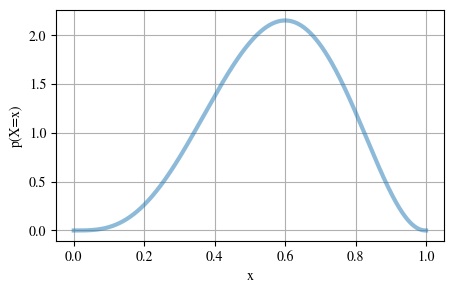

In [107]:
# beta distribution interactive excercise {run: "auto"}
α = 4.3 #@param {type:"slider", min:0.1, max:10, step:0.1}
β = 3.2 #@param {type:"slider", min:0.1, max:10, step:0.1}

beta = stats.beta(α, β)
xs = np.linspace(0, 1, 1000)

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs, np.exp(beta.logpdf(xs)), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
ax.grid(0.3)
plt.show()

### [Optional] Reparameterisation - <font color='orange'>`Intermediate`</font>

Just for fun, let's explore an interesting (and useful!) property of the normal distribution.

Let's say we have samples $x_n$ from a $\mathcal{N}(x|0, 1)$ distribution, but what we really want is samples $y_n$ from $\mathcal{N}(y|\mu, \sigma)$. It turns out that we can easily convert from $x_n$ to $y_n$, or vice-versa. To be specific, we can convert between the random variable $X$ to the random variable $Y$, as follows
$$
Y = \sigma X + \mu
$$
or
$$
X = Y/\sigma - \mu/\sigma.
$$

In fact, this is a property of several other probability distributions called the location-scale family. All of these distributions have the similarity that they are parameterised by a location parameter $\mu$ and a scale paramter $\sigma$! Converting from one distribution to another like this is called *reparameterisation*.

As usual, let's convince ourselves that this is true with some code 😎

In [118]:
np.random.seed(seed=233423)
normal_x = stats.norm(loc=0, scale=1)
samples_x = normal_x.rvs(size=(5,), random_state=rng)

μ = 1
σ = 2
np.random.seed(seed=233423)
normal_y = stats.norm(loc=μ, scale=σ)
samples_y = normal_y.rvs(size=(5,), random_state=rng)
# Note that we are using the same random key as above.

print(f"xs =\t\t{samples_x}")
print(f"ys =\t\t{samples_y}")
print(f"xs*σ + μ =\t{samples_x * σ + μ}")

xs =		[-0.70946287  0.45164151  0.21688765  2.58880533  0.94590852]
ys =		[-0.41892574  1.90328301  1.43377531  6.17761066  2.89181703]
xs*σ + μ =	[-0.41892574  1.90328301  1.43377531  6.17761066  2.89181703]


#### [Optional] Extra reading – the reparameterisation trick - <font color='green'>`Advanced`</font>

When using gradient descent to learn the parameters of the distribution probability distribution given samples from that distribution, we run into a problem. It is not possible to back-propagate through a random operation like sampling. However, if the distribution we are trying to learn is reparameterisable (e.g., it is from the location-scale family), then we can get around this issue. As an example, instead of doing
$$
z_i \sim \mathcal{N}(z\mid \mu, \sigma),
$$
we do
\begin{align}
x_i &\sim \mathcal{N}(x\mid 0, 1), \\
z_i &= x_i * \sigma + \mu.
\end{align}
As illustrated in the diagram below, this allows us to do back-propagation as required.

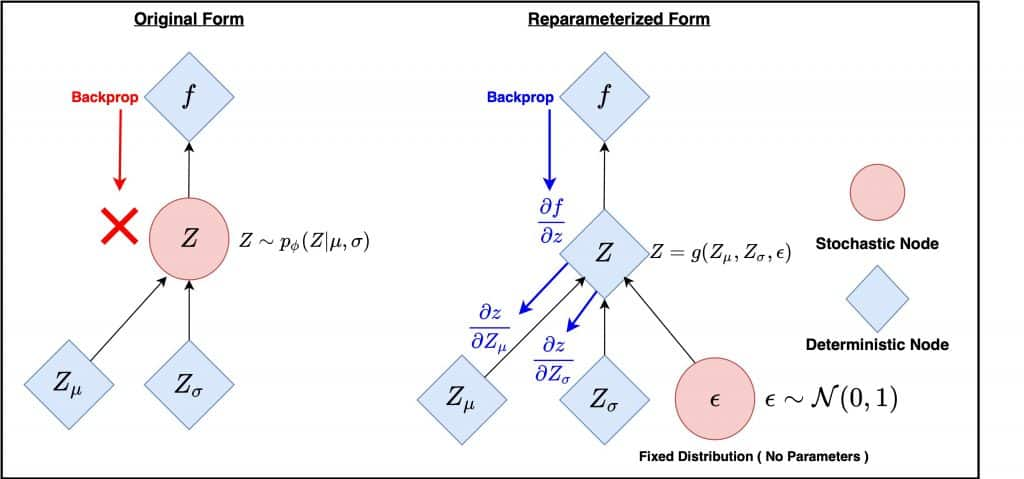

## ⭐ **Multivariate Distributions**

Now that we understand a bit more about continuous distributions and their expected values, let's consider a more complex problem.

What if we want to describe and model the behaviour of *multiple* random variables? We might find that certain outcomes depend on this!

In this case, it would be very helpful to capture each random variable's behaviour, as well as how it interacts with other random variables (i.e. the relationships between then).

**Multivariate distributions** help us to model multiple random variables simultaneously, and better understand their underlying processes.

In this section, we'll have a look at some particular distributions to help us model such RVs, as well as some important concepts about RV interdependence.

### **The Multivariate Normal Distribution**
The multivariate normal distribution generalises the normal distribution to allow us to consider multiple random variables, where the outcomes of these multiple random variables take on a *jointly normal distribution*.

In other words, we can now model variables that are not independent: if we know the value of one variable, that tells us something about the other variables!

More concretely, the multivariate normal distribution lets us consider multiple random variables such that when we condition on some of these variables the remaining variables have a normal distribution (don't worry if you don't know what "condition on" means yet; we'll discuss it shortly).

These variables are distributed in a kind of stretched fuzzy ball in higher dimensional space.

### **Relationships between Variables**
As a rule of thumb, the more one variable tells us about another, the larger the *covariance* or *correlation* between the two. Enough text, let's take a look at the equations, which will hopefully give some further insight. First, let's look at the general PDF for an $D$-dimensional random variable $\mathbf{X}$:
$$
p(\mathbf{X} = \mathbf{x}) = \mathcal{N}(\mathbf{x}\mid \boldsymbol{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^D|\Sigma|}}\exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^\intercal\Sigma^{-1}(\mathbf{x} - \boldsymbol{\mu})\right),
$$
where $\mathbf{x}$ and $\boldsymbol{\mu}$ are now vectors of numbers rather than single numbers, $\Sigma$ is a *covariance matrix* that replaces $\sigma$ from our univariate definition above, and $|\Sigma|$ is its determinant. The covariance matrix looks like this:
$$
\Sigma = \begin{bmatrix}
    \sigma_1^2 & \rho_{12} \sigma_1 \sigma_2 & \cdots &  \rho_{1D} \sigma_1 \sigma_D  \\
    \rho_{21} \sigma_2\sigma_1 & \sigma_2^2 & \cdots &  \rho_{2D} \sigma_2 \sigma_D \\
    \vdots & \vdots & \ddots & \vdots \\
    \rho_{D1} \sigma_D \sigma_1 & \rho_{D2} \sigma_D \sigma_2 & \cdots & \sigma_D^2\end{bmatrix},
$$
where $\sigma_i^2$ is the variance for the $i^{th}$ dimension, and $\rho_{ij} = \rho_{ji}$ is the *correlation* between the $i^{th}$ and $j^{th}$ dimensions. The covariance matrix tells us how the "ball" of random variables is stretched and rotated in space.

**Group task:** Try and convince yourselves that the equation above is equivalent to the univariate case when $D = 1$.

Now let's look at how the equation above simplifies in the two-dimensional case!
<!-- $$
p(X_1 = x_1, X_2 = x_2) = \mathcal{N}\left(\left[{x_1 \\ x_2}\right]\middle| \left[{\mu_1 \\ \mu_2}\right], \left[{\sigma_1^2 & \rho \sigma_1 \sigma_2 \\ \rho \sigma_1 \sigma_2  &\sigma_2^2}\right]\right) \\
= \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1 - \rho^2}}\exp\left(-\frac{1}{2(1 - \rho^2)}\left[\left(\frac{x_1 - \mu_1}{\sigma_1}\right)^2 -2\rho\left(\frac{x_1 - \mu_1}{\sigma_1}\right)\left(\frac{x_2 - \mu_2}{\sigma_2}\right)  + \left(\frac{x_2 - \mu_2}{\sigma_2}\right)^2 \right] \right)
$$ -->

$$
p(X_1 = x_1, X_2 = x_2) 
= \mathcal{N}\!\Biggl(
\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
\;\Bigl|\;
\begin{pmatrix} \mu_1 \\ \mu_2 \end{pmatrix},
\begin{pmatrix}
\sigma_1^2 & \rho \,\sigma_1 \sigma_2 \\
\rho \,\sigma_1 \sigma_2 & \sigma_2^2
\end{pmatrix}
\Biggr)
\\[6pt]
= \frac{1}{2\pi\,\sigma_1\,\sigma_2\,\sqrt{1 - \rho^2}}
\exp\!\Biggl(
-\frac{1}{2\,(1 - \rho^2)}
\biggl[
\Bigl(\tfrac{x_1 - \mu_1}{\sigma_1}\Bigr)^{2}
- 2\rho\,\Bigl(\tfrac{x_1 - \mu_1}{\sigma_1}\Bigr)\Bigl(\tfrac{x_2 - \mu_2}{\sigma_2}\Bigr)
+ \Bigl(\tfrac{x_2 - \mu_2}{\sigma_2}\Bigr)^2
\biggr]
\Biggr).
$$

**Group task 9:** Let's try to understand what the multi-dimensional equation means. Discuss the following questions with your neighbors. If the answers don't seem obvious to you, don't worry! As usual, we have some code to play with to help our understanding, so feel free to use any combination of mathematics and playing with sliders to help you understand. If playing with the sliders still doesn't help, don't worry, the next section will also make things clearer.
1. If $\rho = 0$, how does this two-dimensional case relate to the one-dimensional case above?
2. Now, think about what happens as $\rho$ becomes larger? What if it becomes negative?

**Try this out**: Play around with the parameters of this multivariate normal distribution.

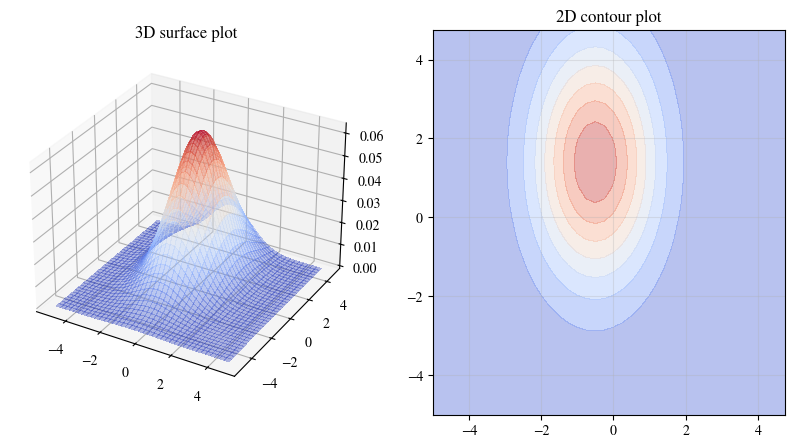

In [110]:
# Multivariate normal interactive excercise 1 {run: "auto"}

#@markdown Both plots below show the same 2D normal distribution. Each plot is useful for visualizing the distribution in different ways.

#@markdown The plot on the left helps us visualise the probability values for each $(x_1, x_2)$ pair.

#@markdown The plot on the right helps us visualise the shape of the distribution from above. Note that the colors represent the same probabilities as the left-hand plot. Each ring shows pairs of equal probability.

from matplotlib import gridspec

μ1 = -0.5 #@param {type:"slider", min:-5, max:5, step:0.1}
σ1 = 1.2 #@param {type:"slider", min: 0.1, max:4, step:0.1}
μ2 = 1.4 #@param {type:"slider", min:-5, max:5, step:0.1}
σ2 = 2.1 #@param {type:"slider", min: 0.1, max:4, step:0.1}
ρ = 0 #@param {type:"slider", min: -1, max:1, step:0.1}

μ = np.array([μ1, μ2])
Σ = np.array([[σ1**2, ρ*σ1*σ2],[ρ*σ2*σ1, σ2**2]])

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')

X1 = np.arange(-5, 5, 0.25)
X2 = np.arange(-5, 5, 0.25)
X1, X2 = np.meshgrid(X1, X2)
Xs = np.concatenate(
    [X1.reshape(-1, 1), X2.reshape(-1, 1)], axis=1
)

Z = np.exp(stats.multivariate_normal(mean=μ, cov=Σ).logpdf(Xs)).reshape(X1.shape)

from matplotlib import cm
ax1.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                linewidth=0, alpha=0.4, antialiased=False)
ax1.set_title('3D surface plot')


ax2 = fig.add_subplot(122)
ax2.contourf(X1, X2, Z, cmap=cm.coolwarm,
            alpha=0.4, antialiased=False)
ax2.set_title('2D contour plot')


ax2.grid(alpha=0.3)
plt.show()

### **The Sum and Product Rules**

Now that we've introduced a multivariate distribution, we can use it to explore two important concepts when working with probability distributions: marginal and conditional distributions. This will lead us to two important rules of probability that we'll need later in the practical (and life): the sum and product rules.

Remember that formally, **joint probabilities** tell us the probability of two or more events for random variables occurring. For two variables, we write $P(A=a,B=b)$. This isn't new - you just saw joint probabilities in action for the multivariate normal distribution! 🤔

#### **Marginal Distributions & the Sum Rule**


Let's consider $p(X_1, X_2)$ a *joint* distribution over two random variables $X_1$ and $X_2$. Now, what if we only cared about one of the random variables e.g., $X_1$? We can use the *sum* rule to *marginalise* away $X_2$ from the joint distribution to give us the *marginal* distribution $p(X_1)$. Concretely, for a discrete $X_2$, the sum rule can be written as
$$
p(X_1 = x_1) = \sum_{x_2} p(X_1 = x_1, X_2 = x_2).
$$
Similarly, for a continuous $X_2$ we'd have
$$
p(X_1 = x_1) = \int p(X_1 = x_1, X_2 = x_2)\, \mathrm{d}x_2.
$$
This rule tells us that if we want a marginal distribution, we just need to enumerate all of the values of the variables that we don't want and sum the resulting distributions.

What if we have three (or more) random variables? Nothing special, which ever variables we don't want to keep in our marginal distribution, we sum over, for example
$$
p(X_1 = x_1, X_3 = x_3) = \sum_{x_2} \sum_{x_4} p(X_1 = x_1, X_2 = x_2, X_3 = x_3, X_4 = x_4).
$$

For a multivariate normal distribution, the sum rule has a very simple and clear form, which will hopefully make things more clear. Specifically, if
$$p(X_1, X_2) = \mathcal{N}\left(\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}\middle| \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}, \begin{bmatrix}\sigma_1^2 & \rho \sigma_1 \sigma_2 \\ \rho \sigma_1 \sigma_2  &\sigma_2^2\end{bmatrix}\right),$$
as defined above, then
$$
p(X_1) = \mathcal{N}\left(x_1 \mid \mu_1, \sigma_1\right).
$$
In other words, we simply 'drop' the variables that we don't care about, and get another normal distribution with only the ones that we do care about!

*Note:* some keen-eyed readers may have noticed something slightly strange... in the joint distribution formula all of the $σ$ 's on the diagonal are squared, whereas in the marginal formal we just write $\sigma$ without the square. That is simply a convention, you can also write $\mathcal{N}\left(x_1 \mid \mu_1, \sigma_1^2\right)$, the meaning is the same.

Another way of expressing marginals, is that when we sum or integrate over all of the possibilities for one variable in a joint probability, we can get the probability distribution of the other! You can intuit the name by thinking of integrating or summing towards the $A$ or $B$ variable axis.


#### 🔧 **Group Task (A7)**

* How might we visualise marginalisation on a Venn diagram?

##### 💡 **Answer (A7)**


Marginal distributions are just the complete circles for each event, ignoring overlaps - here $P(A)$ and $P(B)$!

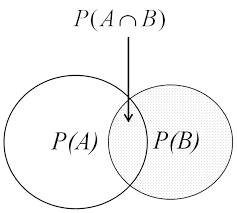

#### **Conditional Distributions & the Product Rule**


As we mentioned above, we use *joint* distributions when one random variable tells us something about another random variable. But how do we actually use that information? For example, if $X_2 = 2$, how does that change the distribution over $X_1$? That is exactly what *conditional* distributions tell us. To be concrete the *conditional* distribution of $X_1$ given $X_2$ can be calculated as
$$
p(X_1 = x_1|X_2 = x_2) = \frac{p(X_1 = x_1, X_2 = x_2)}{p(X_2 = x_2)},
$$
in other words, it is the ratio of the *joint* distribution and the *marginal* distribution of the conditioning variable. Rearranging the above formula, we can now write down a formula for a *join* distribution in the case where the variables *are not* independent
$$
p(X_1 = x_1, X_2 = x_2) = p(X_1 = x_1|X_2 = x_2)p(X_2 = x_2).
$$
What $X_1$ and $X_2$ *are* independent? Then
$$
p(X_1 = x_1|X_2 = x_2) = p(X_1 = x_1),
$$
and then we can write the joint as
$$
p(X_1 = x_1, X_2 = x_2) = p(X_1 = x_1)p(X_2 = x_2),
$$
which recovers the formula we used in group task 3!

As above, for more than two variables, things are still simple
$$
p(X_1 = x_1, X_3 = x_3|X_2 = x_2, X_4 = x_4) = \frac{p(X_1 = x_1, X_2 = x_2, X_3 = x_3, X_4 = x_4)}{p(X_2 = x_2, X_4 = x_4)}
$$
or equivalently
$$
p(X_1 = x_1, X_2 = x_2, X_3 = x_3, X_4 = x_4) = p(X_1 = x_1, X_3 = x_3|X_2 = x_2, X_4 = x_4)p(X_2 = x_2, X_4 = x_4).
$$

And also like above, for the 2-dimensional normal we get some simple equations which can help us understand what is going on when we work with conditional distributions.
$$
p(X_1=x_1|X_2=x_2) = \mathcal{N}\left(x_1\mid \mu_1 + \frac{\sigma_1}{\sigma_2}\rho(x_2 - \mu_2), (1 - \rho^2)\sigma_1^2\right).
$$

**Relating the joint, marginal and conditional probability:**

These quantities are related via: $p(A,B) = p(A \mid B) p(B) = p(B \mid A) p(A)$.

**A Word on Notation:**

**$p(A \cap B)$ vs $p(A , B)$**

* These are equivalent notations for the joint distribution. That is, the probability of event $A$ happening and event $B$ happening.

**What is the '$\mid$' in $p(X\mid a, b, c)$?**

* The bar we often see in the middle of probability distribution notation is used to separate the random variables of the distribution from the variables that the random variables are conditioned on.
* In other words, we have a function with two different kinds of inputs. The inputs on the right of $|$ are conditioning variables. The inputs on the left of $|$ are the values of the random variables under the probability distribution. The output of the function is the probability of the values of these random variables.
* We read $p(A \mid B, C)$ as 'the probability of A *given* B and C'.

#### 🔧 **Group Task (A8)**

* Is it possible to show how a conditional probability $p(A \mid B)$ would look on a Venn diagram? What about the joint?

* Can you see using your Venn diagram that the above statement about joint probabilities is true? What is $p(A\mid B)$ when $A$ and $B$ are independent events (i.e., no overlap on a Venn diagram)?


---


 Let's now try to understand the equations for the sum and product rules by considering the 2-dimensional normal setting. Discuss the following questions with your neighbors. If the answers don't seem obvious to you, don't worry! As usual, we have some code to play with to help our understanding, so feel free to use any combination of mathematics and playing with sliders to help you understand.

* If $\rho = 0$, what happens to the conditional distributions?
* If $\rho \rightarrow 1$, what happens to the conditional distributions? (*Hint:* with a large $\rho$, try setting the standard deviations to 1 and then set mean values to 0 and then slowly increasing or decreasing them).
* How do the standard deviations (and their ratio) impact the conditional distributions (for any value of $\rho$)?
* How does the value of $\rho$ impact the marginal distributions?

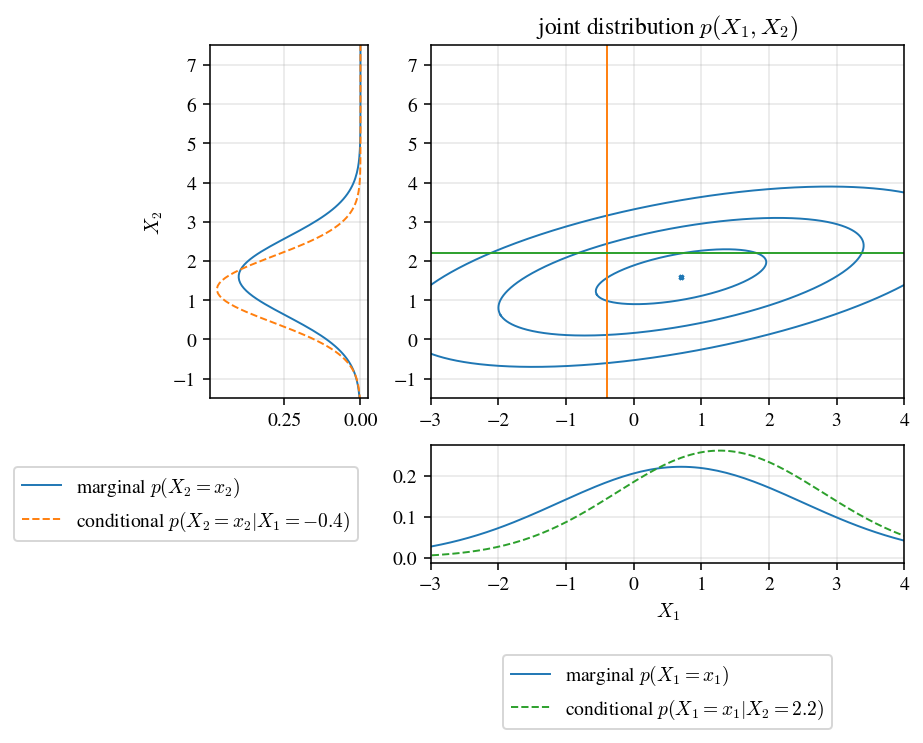

In [111]:
# Multivariate normal interactive excercise 2 {run: "auto"}

from matplotlib import gridspec
from scipy.stats import norm

μ1 = 0.7 #@param {type:"slider", min:-5, max:5, step:0.1}
σ1 = 1.8 #@param {type:"slider", min: 0.1, max:4, step:0.1}
μ2 = 1.6 #@param {type:"slider", min:-5, max:5, step:0.1}
σ2 = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}
ρ = 0.529 #@param {type:"slider", min: -0.999, max:0.999, step:0.001}
x1 = -0.4 #@param {type:"slider", min:-5, max:5, step:0.1}
x2 = 2.2 #@param {type:"slider", min:-5, max:5, step:0.1}

μ = np.array([μ1, μ2])
Σ = np.array([[σ1**2, ρ*σ1*σ2],[ρ*σ2*σ1, σ2**2]])

cond_μ_x1, cond_σ_x1 = Gaussian_conditional(μ, Σ, x=None, y=x2)
cond_μ_x2, cond_σ_x2 = Gaussian_conditional(μ, Σ, x=x1, y=None)

xrange = np.linspace(-10, 10, 300)
density_x1 = norm.pdf(xrange, μ1, σ1)
density_x2 = norm.pdf(xrange, μ2, σ2)

cond_density_x1 = norm.pdf(xrange, cond_μ_x1, cond_σ_x1)
cond_density_x2 = norm.pdf(xrange, cond_μ_x2, cond_σ_x2)

plt.figure(dpi=140)
gs = gridspec.GridSpec(2, 2, width_ratios=[1,3], height_ratios=[3,1])
ax = plt.subplot(gs[0,1])
axl = plt.subplot(gs[0,0], sharey=ax)
axb = plt.subplot(gs[1,1], sharex=ax)

plot_log_gaussian_ellipse(ax, μ, Σ, color='C0', alpha=1, lw=1, label=None, MAP_size=5, std_levels=[0.7, 1.5, 2.3])
ax.set_title('joint distribution $p(X_1, X_2)$')
ax.axvline(x1, lw=1, c='C1')
ax.axhline(x2, lw=1, c='C2')

axb.plot(xrange, density_x1, c='C0', lw=1, label='marginal $p(X_1=x_1)$')
axb.plot(xrange, cond_density_x1, '--', c='C2', lw=1, label=f'conditional $p(X_1=x_1 | X_2={x2})$')
axb.set_xlabel('$X_1$')
axb.set_xlim([-3,4])
axb.legend(bbox_to_anchor=[0.5, -1.1],
           loc='center')

axl.plot(density_x2, xrange, c='C0', lw=1, label='marginal $p(X_2 = x_2)$')
axl.plot(cond_density_x2, xrange, '--', c='C1', lw=1, label=f'conditional $p(X_2 = x_2 | X_1={x1})$')
axl.set_ylabel('$X_2$')
axl.set_ylim([-1.5,7.5])
axl.invert_xaxis()
axl.legend(bbox_to_anchor=[-0.15, -0.3],
           loc='center')

ax.grid(alpha=0.3)
axl.grid(alpha=0.3)
axb.grid(alpha=0.3)
plt.show()


##### 💡 **Answer (A8)**

We can show the joint, but the conditional also takes into account what happened to B - it compares the bit of the chart where both events happened to the bit where B happened.

Conditional probability of A given B:

$$p(A \mid B)=\frac{p(A \cap B)}{p(B)}.$$

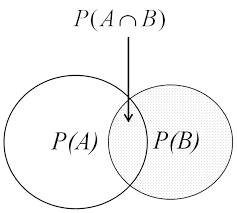


$p(A \mid B)$ - probability of event A given B has occurred<br>
$p(A \cap B)$ - probability that event A and B occurred (the joint, $p(A,B)$)

---

1. If $\rho = 0$, the conditional distributions match the marginal distributions, since conditioning on an independent variable has no effect.
2. As $\rho \rightarrow 1$, the value of the conditional distribution becomes more and more influenced by the value of the conditioning variable. If both means are 0, and both standard deviations are 1, then the conditional distribution converges to the values of the conditioning variable.
3. The smaller the ratio, i.e., the less (relatively) confident we are about the conditioning variable, the less the conditioning variable affects the conditional distribution.
4. $\rho$ does not affect the marginal distributions.

## [Optional] comparing distributions with the KL divergence – <font color='orange'>`Intermediate`</font>

Now that we've seen a few different distributions, and also seen how varied the behavior of a single distribution can be depending on the setting of the parameters, let's take the opportunity to think about how to compare distributions mathematically.

We're going to use a tool called the Kullback–Leibler (KL) divergence as a way of comparing two distributions, $p$ and $q$:
$$
D_\mathrm{KL}\left[p\mid\mid q\right] = \mathbb{E}_{x\sim p(X)}\left[-\log\frac{q(x)}{p(x)}\right].
$$
We can think of the KL divergence as taking a number of samples $x$ from $p(X)$ and then comparing how likely those samples are under $q$ and $p$. A few things to note about the KL divergence:
1. If $D_\mathrm{KL}\left[p\mid\mid q\right] = 0$, then $p$ and $q$ are the same distribution.
2. $D_\mathrm{KL}\left[p\mid\mid q\right] \ne D_\mathrm{KL}\left[q\mid\mid p\right]$, in general.
3. If $p(X)$ is not 0 wherever $q(X) = 0$, then then $D_\mathrm{KL}\left[p\mid\mid q\right] = \infty$. This means that the support of $q(X)$ must contain the support of $p(X)$ if we want to use the KL divergence to compare distributions.
4. For some simple cases (i.e., normal + normal), the formula above can be written in an exact form without the expectation.

Let's take a look at a simple implementation of the KL divergence:

In [119]:
def kl_divergence(p: stats.distributions, q: stats.distributions, n: int = 10_000):
    xs = p.sample(rng, sample_shape = (n,))
    p_log_probs = p.logpdf(xs)
    q_log_probs = q.logpdf(xs)

    return -(q_log_probs - p_log_probs).mean()

**Group task 14:** Use the `kl_divergence` function above, as well as `dist.Normal`, `dist.Uniform`, and `dist.Beta`, to answer the following questions.

1. Calculate the following KL divergence. What do we see?
  * $D_\mathrm{KL}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Uniform}(0, 1)\right]$
  * $D_\mathrm{KL}\left[\mathrm{Beta}(5, 2) \mid\mid \mathrm{Beta}(5, 2)\right]$
2. Calculate the following KL divergences. What can we say about the relationship between the beta and uniform distributions?
  * What is $D_\mathrm{KL}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(5, 2)\right]$?
  * What is $D_\mathrm{KL}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(2, 2)\right]$?
  * What is $D_\mathrm{KL}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(1, 1)\right]$?
3. What is $D_\mathrm{KL}\left[ \mathrm{Beta}(5, 2) \mid\mid \mathrm{Uniform}(0, 1)\right]$. How does it compare to $D_\mathrm{KL}\left[\mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(5, 2)\right]$ from above?
4. Compare $D_\mathrm{KL}\left[\mathrm{Uniform}(-1, 1) \mid\mid \mathcal{N}(0, 1)\right]$ and $D_\mathrm{KL}\left[\mathcal{N}(0, 1) \mid\mid  \mathrm{Uniform}(-1, 1) \right]$.

### Answer to group task A14

1. Both KL divergences are 0, since $p = q$.
2. As the beta distributions shape parameters both get closer to 1, the KL divergence gets smaller, until the KL divergence becomes $\approx 0$, when both shape parameters are 1. This means that ${Beta}(1, 1)$ is a uniform distribution between 0 and 1.
3. As expected, $D_\mathrm{KL}\left[ \mathrm{Beta}(5, 2) \mid\mid \mathrm{Uniform}(0, 1)\right] \ne D_\mathrm{KL}\left[ \mathrm{Uniform}(0, 1) \mid\mid \mathrm{Beta}(5, 2)\right]$
4. While the first KL divergence is valid, the second is $\infty$.

### [Optional] A note on notation: KL divergences

* $D_\text{KL}$ is can also written simply as $\mathrm{KL}$.
* The double bar '$\mid \mid$' is simply a notation choice and doesn't relate to the single bar '$\mid$' in conditional probability distributions.
* We read $D_\mathrm{KL}\left[p \mid\mid q\right]$ as 'the KL divergence between p and q', or alternatively 'the KL divergence from **q** to **p**' to reflect the asymmetry.
* The KL divergence is also called the *relative entropy*.

## Part 2: Bayesian inference

In this second part of the tutorial, we will look at Bayesian inference and a powerful paradigm called probabilistic programming.

**Aims/Learning Objectives:**

* [<font color='orange'>`Intermediate`</font>] Understand the difference between MLE, MAP, and Bayesian learning.
* [<font color='green'>`Advanced`</font>] Understanding the challenges involved in computing Bayes rule and how probabilistic programming solves these.
* [<font color='green'>`Advanced`</font>] Be able to implement a simple probabilistic program.

**Prerequisites:**

* Basic machine learning (e.g., simple supervised and unsupervised machine learning techniques).
* Basic calculus (e.g., computing an integral and taking derivatives to solve min/max optimisation problems).
* Python programming.

**Outline:**

Have a look at the Table of Contents for a more comprehensive outline but, in short, today's practical consists of two parts: [Bayesian inference](#scrollTo=P8Tc509dapfl) and [Probabilistic programming](#scrollTo=2Tz_surdH7AE) \😀/

In [120]:
#TODO: update ToC

>[Introduction to Bayesian Reasoning (Part 2)](#scrollTo=oXhUKM4pmkGc)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>[Part A: Bayesian Inference: What, Why, How](#scrollTo=P8Tc509dapfl)

>>[What is Bayesian inference?](#scrollTo=DbsLMPwJH6_u)

>>[⭐ Bayes' Theorem](#scrollTo=kd0-IZ3iH6_v)

>>[The Prior: Bayesian Inference](#scrollTo=x4TZ2JnkH6_x)

>>[💭 How can we perform true Bayesian inference?](#scrollTo=0rky6ZLxH6_3)

>>[Analytical Bayesian inference](#scrollTo=9hle0E-kH6_3)

>>[Regularisation and Maximum Posterior Estimation](#scrollTo=VGbvL5lA3RQN)

>>[Deriving MAP](#scrollTo=I_e1kgDKAzeS)

>>[Sampling](#scrollTo=pBiZ2I11w6MI)

>[Part B: Probabilistic Programming](#scrollTo=2Tz_surdH7AE)

>>[Probabilistic programming languages (PPLs)](#scrollTo=LSfRig4KH7AE)

>>[🤖 Introduction to NumPyro](#scrollTo=rHChgNuyH7AE)

>>[🧮 Bayesian Linear regression](#scrollTo=WkecBz48H7AJ)

>[💎 Final Words](#scrollTo=4-QOIDwUyCSp)

>>[📚 Resources](#scrollTo=YfL4h4y9QUPt)



# **Part A: Bayesian Inference: What, Why, How**

[<font color='blue'>`Beginner`</font>] /[<font color='orange'>`Intermediate`</font>]

_Note: Most of this section is aimed at an [<font color='orange'>`Intermediate`</font>] level, however, the initial conceptual content is certified [<font color='blue'>`Beginner`</font>] friendly! 🤙 So if you are a beginner, see how far you can get up until the **point estimates** section. If you have some knowledge of calculus and optimisation, the point estimates section will also be accessible. Remember to ask your tutors for help if you get stuck along the way!_

There are **several different approaches** to **probabilistic thinking**. Before we discuss Bayesian inference, let's consider how three schools of thought might approach finding the probability of a coin flip's outcome.

1) **Classical approach** (*theory-driven*): "In a coin flip (assuming a fair coin), there are two outcomesL: heads or tails. Therefore, the likelihood of heads is $\frac{1}{2}$, or $p=0.5$."

2) **Frequentist approach** (*multiple trials*): "We carry out a coin flip experiment 100 times and notice that the probability of heads approaches, but is not exactly, $p=0.5$. We reason that, with an infinite number of trials, the likelihood of heads approaches $p=0.5$, and so this is the event's probability.

3) **Bayesian approach** (*incorporates prior beliefs*): "We have some belief about the likelihood of a particular outcome. We carry out a series of coin flips to capture observed data and bring this together with our prior knowledge. This updated model then represents the probability of our possible coin flip outcomes."

Which of these approaches to use varies between probabilistic problems. While the classical and frequentist approaches are likely most suitable in this example, there are many cases where a Bayesian perspective is incredibly powerful.

So, with this in mind, let's dive into the world of Bayesian inference!

**What you will learn:**

- What is Bayesian inference?
- Why is it important/useful?
- How to perform Bayesian inference: the painful (old) way and a modern way... 😮

## ***What* is Bayesian inference?**



In short, Bayesian inference is the process of deducing properties of a probability distribution from data using Bayes’ theorem. It incorporates the idea that probability should include a measure of <font color='purple'>`belief`</font> 💭 about a prediction or outcome.

Bayesian inference is a method of statistical inference in which probability is used to <font color='purple' >`update beliefs`</font> about model's parameters based on available <font color='red'>`evidence or data`</font> 📁.

This is important in real world scenarios where prior beliefs must be incorporated in a model.

### 🔧 **Group Task (A1)**

To better understand the role of prior <font color='purple'>`beliefs and subjective probability`</font>, discuss with your neighbour the following questions:


- What is the probability that it will rain tomorrow?
- What is the probability that the next president will be a woman?
- What is the probability that aliens built the pyramids?

How do these questions compare to the probability that a die will roll a 6?

Such questions, unlike the die, cannot be answered by "long-run" probability, i.e., probability obtained from multiple repeated runs of the same experiment. A certain degree of <font color='purple'>`belief`</font> 💭 is involved.

<font color='purple'>`Priors`</font> 💭 and "subjective" probability are foundational for Bayesian inference!


## ⭐ **Bayes' Theorem**

_Note: Conditional probability is the axis on which Bayesian statistics turns! We do assume some prior knowledge of joint and conditional probabilities in the following section, so please refresh your knowledge of this before proceeding, if needed!_

Let's suppose we are interested in knowing the chance of lightning 🌩 given that we observe rain 🌧.

From the **Chain rule of probability**, we know that if 🌧 and 🌩 are random variables, we can write their joint probability as follows:

\begin{equation}
\large p(🌧, 🌩) = p(🌧 \mid 🌩)p(🌩)
\end{equation}

Alternatively, we can write the joint distribution as:

\begin{equation}
\large p(🌧, 🌩) = p(🌩 \mid 🌧)p(🌧)
\end{equation}

Combining these two equations, we obtain a formula for relating the two conditional probabilities:

\begin{equation}
\Large p(🌩 \mid 🌧) = \frac{p(🌧 \mid 🌩)p(🌩)}{p(🌧)}
\end{equation}

This is the famous **Bayes' Theorem!** ⭐

Why is it so famous? Well let's understand what it means and gives us first!

---


### **Prior, Likelihood and Posterior**

Bayes' Theorem is commonly seen in machine learning and other models that treat the <font color='red'>`data`</font> $\mathcal{D}$ and <font color='purple'>`parameters`</font> $\theta$ which belong to some <font color='blue'>`model class`</font> as random variables:

\begin{equation}
\Large \underbrace{p(\theta \mid \mathcal{D})}_{\text{Posterior}} = \frac{\overbrace{p(\mathcal{D} \mid \theta)}^{\text{Likelihood}}\, \overbrace{p(\theta)}^{\text{Prior}}}{\underbrace{p(\mathcal{D})}_{\text{Evidence}}}
\end{equation}

Each quantity/term in Bayes' Theorem has a special name.

* $p(\mathcal{\theta})$ is the <font color='purple'>`prior`</font>. The prior is a distribution which reflects what we may know about how the model parameters are distributed. If we know nothing about the model parameters, we may choose an non-informative prior, such as the Uniform prior. Otherwise, if we are super sure about how the parameters are distributed, we may choose a very specific prior distribution such as [the Kent distribution](https://en.wikipedia.org/wiki/Kent_distribution) (_you do not need to know what this is_).

* $p(\mathcal{D} \mid \theta)$ is the <font color='teal'>`likelihood`</font> . The likelihood tells us _"how likely"_ we are to observe the data if we plug the given parameter values $\theta$ into the <font color='blue'>`model class`</font>.
We are usually interested in finding model parameters that give a high likelihood score. We discuss this in more detail in the **Maximum Likelihood Estimation** section.

* and $p(\theta \mid \mathcal{D})$ is the <font color='pink'>`posterior`</font>. We can think of the posterior probability as the "updated prior distribution" over $\theta$ after we have observed the data $\mathcal{D}$. Parameter values that have a high probability of reproducing the data will also have a high posterior probability $p(\theta \mid \mathcal{D})$.

* The denominator $p(\mathcal{D})$ is often called a *normaliser* or <font color='red'>`evidence`</font> . It ensures that the posterior <font color='pink'>`posterior`</font> $p(\theta \mid \mathcal{D})$ is a valid distribution, i.e., has an integral of 1. For this reason, you will often see Bayes rule summarised as "<font color='pink'>`posterior`</font> $\propto$ <font color='purple'>`prior`</font> $\times$ <font color='teal'>`likelihood`</font> ", which ignores the denominator since it is a constant (independent of $\mathcal{\theta}$). This posterior summarises our belief state about the possible values of $\theta$.

We can also write Bayes' Theorem as:

\begin{equation}
\Large \underbrace{p(\theta \mid \mathcal{D})}_{\text{Posterior}} = \frac{\overbrace{p(\mathcal{D} \mid \theta)}^{\text{Likelihood}}\, \overbrace{p(\theta)}^{\text{Prior}}}{\underbrace{\int p(\mathcal{D} \mid \theta)\, p(\mathcal{\theta})d\theta}_{\text{Evidence}}}
\end{equation}

where we express the <font color='red'>`evidence`</font> $p(\mathcal{D})$ as a the **marginalisation** of the model parameters from the numerator $p(\mathcal{D} \mid \theta)p(\theta)$. As such, the <font color='red'>`evidence`</font> is sometimes called the **marginal likelihood**. _Remember that the integral becomes a summation when we consider discrete random variables!_


### 🔧 **Group Task (A2)**

* Switch $A$ and $B$ in $\
p(B \mid A) = \frac{p(A \mid B)p(B)}{p(A)}$ and label what is the posterior, likelihood, prior and evidence in the new equation.
* Explain what each means to each other a few times to be sure you know what goes where!

_Often the literature will refer to these 'labels' and require you know them already, so while they might seem arbitrary this memorisation task goes a long way to making your life easier in practice!_

#### 💡 **Answer (A2)**

In a picture format:

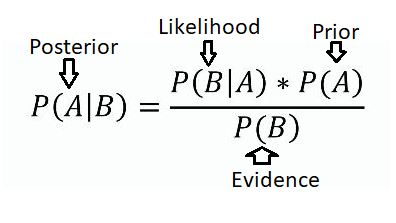


To reiterate:

- Prior is what is known or estimated a priori
- Likelihood is probability of data given parameters of interest
- Posterior is probability of parameters of interest given data

## **The Prior: Bayesian Inference**

Let's get to grips with these concepts a bit more by thinking about some everyday examples!


<div align="center">

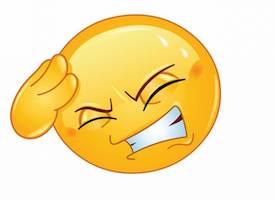
</div>

Imagine a situation where you need make a decision concerning your health. You have a headache, and can choose between two doctors:

**Doctor 1:**
- Has a mental model for the cause of pain.
- Performs tests.

**Doctor 2:**
- Has a mental model for the cause of pain.
- Has access to the patient's chronic history.
- Performs tests.

Which doctor do you choose? Can you make sense of which parts are the <font color='red'>`data`</font>, <font color='teal'>`likelihood`</font> and <font color='purple'>`prior`</font> in this scenario?

Inference without priors is like a doctor who does not know the patient's history!

### 🔧 **Group Task (A3)**

We know that the probability of having fever this time of the year is 10%, the probability of having COVID is 7%, and among all people who have COVID, 70% of them have fever.

If you're a doctor, you don't know whether someone has COVID until you test them, but they may present with a high temperature and you want to reason whether to isolate them on that basis! So you are interested in knowing the chance that someone has COVID given they have a high temperature.

Find the probability that a patient has COVID given they have high temperature (fever).



#### 👀 **Hint**

Again, make sense of which parts are the <font color='red'>`data`</font>, <font color='teal'>`likelihood`</font> and <font color='purple'>`prior`</font> in this scenario and use Bayes' Theorem!

For two simple events, Bayes' theorem can be written as

$$ p(A\mid B) = \frac{p(B\mid A) p(A)}{p(B)}.$$

#### 💡 **Answer (A3)**

Write out your probabilties, with $F$ for **F**ever and $C$ for **C**OVID.

We want the <font color='pink'>`posterior`</font> $p(C \mid F)$.

<font color='teal'>`likelihood`</font>: $p(F \mid C) = 0.7$

<font color='purple'>`prior`</font>: $p(C) = 0.07$
 
<font color='red'>`data`</font>: $p(F) = 0.1$

Combining these with Bayes' Rule:
 $$
 \begin{align}
    p(C|F) &=& \frac{p(F\mid C) p(C)}{p(F)} \\
 &=& \frac{0.7 \cdot 0.07}{0.1} \\
 &=& 0.49
\end{align}
$$
So almost half of the patients seen with fever are likely to have COVID!

### **Choosing the  <font color='purple'>`prior`</font> distribution**



In the doctor example, if the doctor we go to has access to history, but only from when the patient was a child and not for their recent years as an adult, they might make the wrong inferences about the current cause of a headache. For example, if they don't know that the patient was in a car accident last month and banged their head, they could get the cause of the headache very wrong! 🥴

The choice of the  <font color='purple'>`prior`</font> 💭 is really important! It can depend on a few things:

- Type of distribution (we will see this in a second)
- Hyperparameters/hyperpriors
- Often there is a 'natural' candidate for prior choice
- Whether it creates a posterior that is mathematically solvable or not
- Some do (conjugate <font color='purple'>`prior`</font>)
- Most do not (non-conjugate)...

### **The influence of <font color='purple'>`priors`</font>**



Let us explore how much <font color='purple'>`priors`</font>  can actually influence the posterior. Since the marginal distribution $p(y)$ does not depend on the parameters, we will only explore the posterior up the to proportionality term.

$$p(\theta |y ) ∝ p(y| \theta) p(\theta).$$

If we have access to point-wise evaluations of the <font color='teal'>`likelihood`</font> $p(y | \theta)$ and prior $p(\theta)$, we can compute their product to obtain this posterior.

Consider the coin tossing problem, which we describe using the Bernoulli distribution for a single trial, and the product of Bernoullis for multiple trials. When we compute a <font color='teal'>`likelihood`</font> by multiplying independent Bernoulli trials, this is like a *permutation* in so far as the *order* of the tosses matters.

Another formulation for a repeated Bernoulli random variable is to consider the _proportion_ of correct trials without considering order. We can normalise for this using the formula for combinations, which you may know of as "$n$ choose $k$." This lets us define a random variable on the number of succeses in $n$ trials called a **Binomial random variable**.

Let's say that out of
$$n=10$$
tosses we obtained
$$h=6$$
successes.

Let's consider: what is the probability of "success" for this coin? We'll simulate some examples using a binomial random variable.

**[Optional]:** *Show that the <font color='teal'>`likelihood`</font> for coin tosses calculated using independent Bernoulli random variables (a Bernoulli process) is proportional (up to a constant) to the likelihood for coin tosses calculated using a Binomial random variable.*

#### 🤖 **Code to compute the posterior (run this, but you can leave this hidden)**

In [122]:
##############################################
# prior x likelihood = posterior
##############################################

h=6
n=9
p=h/n

# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = np.linspace(0, 1, grid_points)

# compute likelihood at each point in the grid
log_prob_likelihood = stats.binom(n, p=p_grid).logpmf(h)

# normalize likelihood to get the likelihood PMF
likelihood_pmf = np.exp(log_prob_likelihood - np.max(log_prob_likelihood)) / np.sum(np.exp(log_prob_likelihood - np.max(log_prob_likelihood)))

In [123]:
def computePosterior(likelihood, prior):
    # this functionm computes posterior
    # and plots the result

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize posterior
    posterior = unstd_posterior / unstd_posterior.sum()

    plt.figure(figsize=(17, 3))
    ax1 = plt.subplot(131)
    ax1.set_title("Prior")
    ax1.grid(0.3)
    plt.plot(p_grid, prior,color='purple')

    ax2 = plt.subplot(132)
    ax2.set_title("Likelihood")
    ax2.grid(0.3)
    plt.plot(p_grid, likelihood,color='teal')

    ax3 = plt.subplot(133)
    ax3.set_title("Posterior")
    plt.plot(p_grid, posterior,color='gray')
    ax3.grid(0.3)
    plt.show()

    return

### **<font color='purple'>`Prior`</font> 1: Uniform**



Our first <font color='purple'>`prior`</font> will be a Uniform distribution:

$$p(\theta) = 1.$$

This means we don't think the coin is likely to be weighted or not: the probability of heads could take any value between 0 and 1 equally.

This is the same as not having a prior at all! So we should expect the likelihood and posterior distributions to look the same (if that isn't intuitive to you, speak to a tutor).

Run the code cell below to confirm your intuitions.

In [ ]:
# Uniform prior
prior1 = np.repeat(1, grid_points)

# visualise prior, likelihood, posterior
posterior1 = computePosterior(likelihood_pmf, prior1)

### **<font purple='yellow'>`Prior`</font> 2: Step-function**




Perhaps we are pretty sure that heads is more likely than tails i.e. the coin is weighted, but we don't know by how much.

We could set this up as a step-function where the probability is 0 below a certain value, and uniform after.

#### 🤖 **Code Task 1**

Implement the step-function prior:

$$p(\theta) = 1.$$

$$
p(\theta) = \begin{cases}
0 \text{ if } \theta <= 0.5 \\
1 \text{ otherwise. }
\end{cases}
$$

How do you think the posterior will change? Sketch the prior to give yourself some intuition!

In [ ]:
#@markdown *Hint:* Try to reset the value of the prior greater than 0.5 to 1 and less than or equal to to 0. You could use `jnp.round` or `.astype`; you can also just code from scratch ignoring the helper code (remembering to have `grid_points` data points!)

def step_prior(gridpts = grid_points):
  # define regular grid in the (0,1) interval -- this will step from 0 to 1 in intervals, you could modify this for your answer but you do not have to
  p_grid = np.linspace(0, 1, gridpts)
  prior2 = ### fill in your code here ###
  prior2 =
  return prior2


##### ☑️ **Test your code**

In [ ]:
#@markdown Run this to test your code!
def correct_step(gridpts = grid_points):
  s_prior=step_prior()
  p_grid = jnp.linspace(0, 1, gridpts)
  correct = False
  if (s_prior == ((p_grid >= 0.5).astype(int))).all():
    correct = True
  elif (s_prior == (jnp.round(p_grid,0))).all():
    correct = True
  return correct

cs = correct_step()

if cs == True:
  print('Correct! Here is what the posterior looks like:')
else:
  print('That is not quite right; try again. Here is what the posterior looks like:')
posterior2 = computePosterior(likelihood_pmf, step_prior(gridpts = grid_points))

##### 💡 **Answer (Code Task 1)**

In [ ]:
prior2 = (p_grid >= 0.5).astype(int)
posterior2 = computePosterior(likelihood_pmf, prior2)

### **<font color='purple'>`Prior`</font> 3: Custom prior centered at 0.5**

Let's imagine some prior that is centered at 0.5, and decays (exponentially) on either side. Run the below code and validate that this prior looks like you would expect, and shifts the likelihood to the posterior as you would expect.

In [ ]:
prior3 = np.exp(- 5 * abs(p_grid - 0.5))
posterior3 = computePosterior(likelihood_pmf, prior3)

#### 🔧 **Group Task (A4)**

 * Does it matter if the priors or likelihood are true probability distributions, that is that they sum to 1? Why not? For Bayesian inference (our posterior), does it matter?

##### 💡 **Answer (A4)**

No it does not matter if the pmfs do not sum to 1. For Bayesian inference, i.e. finding the posterior, normalising is just a proportional constant!

### **Informative or non-informative priors**

Choosing a prior is hard!

- Main source of criticism from non-Bayesians is how priors are chosen.
- Priors should be informed by existing knowledge.
- But what if we don't know anything before (prior to) inference?
- Non-informative/informative priors are outside scope of this section, but something to pay attention to when you encounter these models in the wild! 🐅

## 💭 ***How* can we perform true Bayesian inference?**

[<font color='orange'>`Intermediate`</font>]

### What does it take?
- <font color='red'>`Data`</font>
- A generative model (how does the conditional <font color='teal'>`likelihood`</font> come about?)
- Our <font color='purple'>`beliefs`</font> before seeing the data.

### What does it make?
- The values of parameters that could give rise to the observed data **in the form of a distribution**.

### *How* can we perform Bayesian inference?

- **Analytically**
        
     Solving the maths! This is an elegant approach. However, it is rarely available in real life.

- **Numerically**

    - Rather than deriving a posterior distribution in the closed form, we can use computational tools to **sample** from the posterior. The obtained samples describe the distributions of parameters.
    
    - We achieve this by exploring the space of parameters to find the most probable combinations of parameters.
    
    - Further we treat the obtained samples as new data, to extract information about parameters, such as mean, credible interval or other statistics.

### Numerical methods

- Markov Chain Monte Carlo (MCMC) family of algorithm, e.g.,
  * Metropolis-Hastings
  * Gibbs
  * Hamiltonian Monte Carlo (HMC)
  * No-U-Turn sampler (NUTS)
  * further variants such as SGHMC, LDHMC, etc
- Variational Bayes
- Approximate Bayesian Computation (ABC)
- Particle filters
- Laplace approximation

More on this later! First, let's discuss some analytics and point estimates.

## **Analytical Bayesian inference**

[<font color='orange'>`Intermediate`</font>]

### **Point estimates**

To illustrate the use of Bayes' Theorem further, let's explore the coin flip example that you saw with the Bernoulli distribution to try to figure out whether a coin is weighted or not. 💰

We really just want one answer out of this problem -- the probability that a coin will give us a heads (since we know that the probability of tails is just $1- p(heads)$). This is a <font color='green'>`point estimate`</font>: one answer out of a range.

In machine learning, we are often interested in estimating parameters $\theta$ that best allow us to describe our data. Generally this leads to solving some optimisation problem for a loss function $\mathcal{L}$, i.e.
\begin{equation*}
\hat{\theta} = {\arg \min}_\theta \mathcal{L}(\theta)
\end{equation*}

This gives us a <font color='green'>`point estimate`</font> $\hat{\theta}$.

### 🔧 **Group Task (A5)**

Does a point estimate tell us anything about our uncertainty or the distribution from which we draw the estimate? Discuss the difference between <font color='green'>`point estimates`</font> and estimating a *distribution*.


#### 💡 **Answer (A5)**

No. Point estimates _assume_ there is a true but unknown value of the parameters we want to find. We use (Bayesian) inference (which notably here isn't the same as inference in the prediction sense) to incorporate uncertainty. Inherently, we represent this as randomness, and rather than find the true value of the parameter, we look for its distribution in the posterior $p(\theta \mid \mathcal{D})$.

### **Maximum likelihood estimation**

We might want to choose the point estimate of parameters that maximises the probability that our model describes the training data. This is called **<font color='teal'>`maximum likelihood estimation`</font>** (MLE), and is what one most commonly does when fitting point estimates for parameters.

\begin{equation*}
\hat{\theta}_{MLE} := {\arg \max}_{\theta} p(\mathcal{D} \mid \theta)
\end{equation*}

Let's apply this to coin tosses, using what we already know about distributions from the first section of the practical. 😸

#### **MLE for a Bernoulli process**

First, some maths. Let's assume we have some $N$ coin flips, which we can assume are independent, where $H=1$ is a flip resulting in heads and $H=0$ tails. Let's denote the random variable for the flip on trial $i$ by $h_i$.

We can model this as a Bernoulli process, like we did in the first section of this notebook. Given $n$ trials (coin flips), we want to compute the MLE parameter that tells us whether the coin is weighted or not: what is the proportion or likelihood of getting heads, $p(H=1) = \theta$?



### 🔧 **Group Task (A6)**

Write down the **<font color='teal'>`negative log likelihood`</font>** ($\text{NLL}(\theta)$) for this problem. Try to simplify as far as you can go!

#### 👀 **Hint**

Break down what this means -- likelihood means $p(H \vert \theta)$, log means logarithm, and negative means multiplying something by -1 (ask your instructor if you don't know why we do these steps, they each make our jobs in computing probabilities easier!).

#### 💡 **Answer (A6)**

Think of the **likelihood** bit first: this is just $p(H \vert \theta)$ from our definition above. We have $N$ trials and they are independent, so the overall likelihood is going to be the product of the likelihood on each trial, $p(h_i \vert \theta)$:

\begin{align}
\mathcal{L}(\theta) = \prod_{i=1}^N p(h_i \vert \theta)
\end{align} \\

Now we can combine the likelihood with the **negative log** bit and what we know about the form of the Bernoulli distribution to get:

\begin{align}
NLL(\theta) &=& - \log \prod_{i=1}^N p(h_i \vert \theta) \\
&=& -\log \Bigg[ \prod_{i=1}^N \theta^{h_i} (1-\theta)^{(1-h_i)} \Bigg] \\
\end{align} \\

Using the properties of the logarithm (remember, these turn products into sums!):

\begin{align}
NLL(\theta) &=& - \sum_{i=1}^N \bigg[h_i \log(\theta) + (1-h_i)\log(1-\theta)\bigg] \\
&=& - \Bigg[\sum_{i=1}^N h_i \Bigg] \log(\theta) - \Bigg[\sum_{i=1}^N 1-h_i \Bigg]\log(1-\theta) \\
\end{align} \\

Now the Bernoulli R.V.s $h_i$ are defined as either 0 or 1, depending in this case on whether each is heads or tails. So when we are summing over them we are really _counting_ the number of heads and tails (which remember is the same as $N-$ number of heads) across all the trials!

Let's call the number of heads $N_1$ and the number of tails $N_0$. Then the negative log likelihood becomes:

\begin{align}
NLL(\theta) &=& - N_1 \log(\theta) - N_0 \log(1-\theta) \\
&=& - \Big[ N_1 \log\theta + N_0 \log(1-\theta)\Big]
\end{align}

### MLE by hand and in code

We can implement this in code to find the **<font color='teal'>`maximum likelihood estimation`</font>** ($\arg \max_\theta \text{NLL}(\theta)$), but we can also go a bit further and try to simplify the equation we have found via optimisation. We want to minimise the NLL, so we can set the derivative of the quantity to 0 and then solve.

**Group task 8**: Find the MLE by solving the optimisation problem $\frac{d}{d\theta} \text{NLL}(\theta) = 0$. Does the answer make sense to you?

##### Hint

How to derive the MLE estimate with words? (This will help if you don't completely understand the derivation below 😸)

$$L (\theta) = \theta^\text{heads} (1-\theta)^\text{tails}  $$


$$\log L (\theta) = \text{heads} * \log \theta +  \text{tails} * \log (1-\theta)  $$

$$ \frac{d \log L}{ \ d \theta} = \frac{\text{heads}}{\theta} + \frac{\text{tails}}{1-\theta} = 0 $$

and so

$$ \hat{\theta} = \frac{\text{heads}}{\text{heads + tails}} $$

#### Answer to group task B8

Diving in:

\begin{align}
  0 &=& \frac{d}{d\theta} \text{NLL}(\theta) \\
  &=& \frac{d}{d\theta} \bigg[ - \Big[ N_1 \log\theta + \big[N_0-N\big] \log(1-\theta)\Big]\bigg] \\
  &=& -N_1 \frac{d}{d\theta}\big[\log\theta\big] -N_0 \frac{d}{d\theta} \big[\log(1-\theta)\big]\\
\end{align} \\

You need to remember the univariate chain rule and derivative of logarithm to do the next step! Just look them up if you've forgotten! 🤭

\begin{align}
  0 &=& -\frac{N_1}{\theta} + \frac{N_0}{1-\theta} \\
  &\implies & \hat{\theta}_{MLE} = \frac{N_1}{N_1+N_0} = \frac{N_1}{N}
\end{align} \\


This answer is just the (empirical i.e. experimental) fraction of heads that we flipped across all $N$ trials -- that should make sense!

### 🔧 **Group Task (A7)**

Play with the slider below to calculate the likelihood for different numbers of heads $h$. What happens when $h$ is more than the total coin flips?

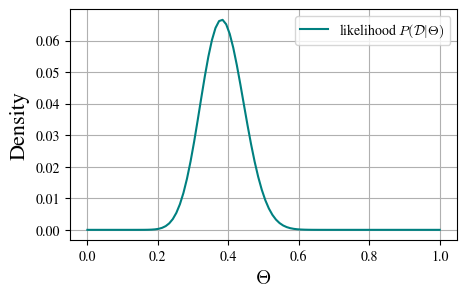

In [124]:
# MLE interactive task  {run: "auto"}

##############################################
# coin tossing
# n number of tosses
# p_H proportion of heads
# h number of heads (this is set by p and n)
##############################################

# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = np.linspace(0, 1, grid_points)

n = 63 #@param {type:"slider", min:1, max:100, step:1}
h = 24 #@param {type:"slider", min:0, max:100, step:1}


# compute likelihood at each point in the grid
log_prob_likelihood = stats.binom(n, p=p_grid).logpmf(h)

# normalize likelihood to get the likelihood PMF
likelihood = np.exp(log_prob_likelihood - np.max(log_prob_likelihood)) / np.sum(np.exp(log_prob_likelihood - np.max(log_prob_likelihood)))

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(p_grid, likelihood,color='teal',label='likelihood $P(\mathcal{D}|\Theta)$')
ax.legend()
ax.set_xlabel('$\Theta$', fontsize=14)
ax.set_ylabel('Density', fontsize=16)
ax.grid(0.3)
plt.show()

### **Implementing MLE: Code Task 2**

Now, let's implement the MLE for the Bernoulli process (or the Binomial - likelihood is the same up to proportionality, recall; this is the **likelihood principle**)! 🏫

See if you can code it and then test it in the code that follows!

In [ ]:
def mle(H, N):
  p_mle = ## put your code here! write this in terms of the number of heads (H) and total flips (N)
  return p_mle

#### ☑️ **Test your code**

In [ ]:
# Run me to test your code
def mle_true():
  correct = False
  if np.round(mle(h, n),1) == np.round(h/n,1):
    correct = True
  return correct

if mle_true() == True:
  print('Correct!')
else:
  print('Hmm, not quite... Note that we round at the first decimal!')

#### 💡 **Answer (Code Task 2)**

In [127]:
def mle(H, N):
  p_mle = H/N
  return p_mle

### **Problems with MLE**

MLE seems to be a straightforward and intuitive approach, but it has a few problems. 😮
* It doesn't take into account the amount of data we have fed it.
* There is no notion of uncertainty.
* MLE is prone to overfitting because it may perfectly fit the empirical data we give it, but not predict well on future data.

#### 🔧 **Group Task (A8)**

For example, let's consider the case in which we take 4 trials and see 4 heads consecutively. Using the sliders and derived formula above, calculate the MLE for the parameters in this situation. How likely do you think it is that this reflects the truth? What is the probability that we just happened to get 4 heads in a row for a balanced coin (i.e. where we make the prior assumption that $\theta = 0.5$)?

Play with the sliders and see how things change as the number of samples increase: would you be more or less confident in your answer for the MLE with a much larger number of trials?


##### 💡 **Answer (A8)**

If you use the formula or sliders, you should get $\theta_{MLE}=1$ - which means we are certain we will continue to get heads! That seems a bit odd, since the probability of 4 heads in a row for a balanced coin is $\frac{1}{16}$ (assuming order matters). This is also called **overfitting**, since we have a MLE estimate that perfectly works on the data we have available (which you could think of as training data) but probably does not generalise to prediciton on test data. Intuitively, you should be happier with the MLE as the number of data points grows: but there isn't anything inherently in the MLE procedure that can tell you that degree of confidence or uncertainty!

We would like to be able to take a prior/weighting into consideration, which motivates the next section: MAP estimates!

#### [Optional] MLE is minimising KLD [<font color='red'>`Advanced`</font>]


It turns out that minimising the KL divergence is the same as maximising the <font color='teal'>`likelihood`</font> estimate!

\begin{equation*}
\arg \min_\theta D_{KL} (p(x \mid \theta^*) \mid\mid p(x \mid \theta)) = \arg \max_\theta p(\mathcal{D} \mid \theta)
\end{equation*}

Let's walk through the proof.

Remember that when $p$ is the underlying distribution, minimising the KL divergence means finding optimal parameters $\theta$ for distribution (or model) $q$ so that $\mathbb{E}_{x \sim p} \big[ \log \frac{p(x \mid \theta^*)}{p(x \mid \theta)} \big]$ is minimal. Here, $\theta^*$ are the optimal parameters (that we don't know) and $\theta$ the parameters we are trying to find. Since we don't ever know $\theta^*$ we will write $p(x)$ instead of $p(x \mid \theta)$ below (don't let it trick you up!).

Often in Bayesian inference, $p(x \mid \theta)$ is written as $q(x \mid \theta)$ where $q$ is the inferred distribution.

**Exercise**: See if you can think how to simplify this equation into terms containing just $\theta$.

##### Answer:

\begin{align}
\arg \min_\theta D_{KL}(p \vert \vert p(x \vert \theta) &=& \arg \min_\theta \mathbb{E}_{x \sim p} \bigg[ \log \frac{p(x)}{p(x \vert \theta)} \bigg] \\
&=& \arg \min_\theta \mathbb{E}_{x \sim p} \big[ \log p(x) - \log p(x \vert \theta) \big] \\
&=& \arg \min_\theta - \mathbb{E}_{x \sim p} \big[ \log p(x \vert \theta) \big] \\
\end{align}

Since $p(x \vert \theta^*)$ is not dependent on $\theta$.

##### Optimisation on the min KLD problem

Note that we can always flip a minimisation into a maximisation using a negative sign:

\begin{equation*}
\arg \min_\theta \Big[- \mathbb{E}_{x \sim p} \big[ \log p(x \vert \theta) \big]\Big] = \arg \max_\theta \mathbb{E}_{x \sim p} \big[ \log p(x \vert \theta) \big]
\end{equation*} \\

And here's a tricky bit that you may not of seen: we need to use the definition of expectation and the law of large numbers to write out the expectation in terms of some $x_i$ drawn from the distribution $p$.

**Exercise**: See if you can complete the rest of the proof using this knowledge. 😸

##### Answer:

\begin{align}
 \arg \max_\theta \mathbb{E}_{x \sim p} \big[ \log p(x \vert \theta) \big] &=& \arg \max_\theta \lim_{n \rightarrow \infty} \sum_{i=1}^n \log(p(x_i \vert \theta)) \\
 &=& \arg\max_\theta \log P(x\vert \theta) \\
 &=& \arg \max_\theta P(\mathcal{D} \vert \theta) \\
 &=& \hat{\theta}_{MLE}
\end{align}

As we wished to show!

## **Regularisation and Maximum Posterior Estimation**


We can try to eliminate some overfitting through adding a penalty term to the NLL (this is known as regularisation ⤴):

\begin{equation*}
\mathcal{L}(\theta; \lambda) = \text{NLL}  - \lambda C(\theta)
\end{equation*}

Commonly, we use $C = p(\theta)$, where $p(\theta)$ is the <font color='purple'>`prior`</font> for $\theta$. If $\lambda = 1$,

\begin{align}
\hat{\theta} &=& \arg \min_\theta -\big[\log p(\mathcal{D\mid \theta}) + 1\cdot \log p(\theta)\big]\\
&=& \arg \max_\theta \big[\log p(\mathcal{D\mid \theta}) + \log p(\theta)\big] \\
& =& \arg\max_\theta \log \big[p(\mathcal{D\mid \theta})p(\theta)\big] \\
&=& \arg\max_\theta \log p(\theta \mid \mathcal{D})
\end{align}

This is the same as _maximising the log posterior_ -- hence, **<font color='violet'>`maximum a posterior estimation`</font>** (MAP)! 🥳

### **Coin Flips: the Bayesian way**

Let's apply this to the Bernoulli coin flip example. 💰 We'll use a beta distribution for the <font color='purple'>`prior`</font>, $p(\theta) = \text{Beta}(\theta \mid a,b)$:

\begin{equation*}
p(\theta \mid a,b) = \text{Beta} (\theta \mid a,b) = \frac{\theta^{a-1}(1-\theta)^{b-1}}{\beta(a,b)}
\end{equation*}

Note that the <font color='violet'>`maximum a posterior (MAP)`</font> estimate is still a point estimate -- it just takes into account our belief about the <font color='purple'>`prior`</font> distribution.

*If you need a refresher on beta distributions, check back to the probability distribution section!*

**Group task 12**: By hand, calculate the MAP estimate with a beta prior.


#### Hint

Start with $\mathcal{L}(\theta) = \log p(\mathcal{D}\mid \theta)+\log p(\theta)$ and recall that we have already calculated $\log p(\mathcal{D}\mid\theta)$ in the MLE section - is it is the negative of the negative log likelihood!

Then, optimise (take derivatives in terms of $\theta$ and set to 0).

_Note: Can you see why the negative log likelihood vs "positive" log likelihood will give you the same answer when optimising? Remember than optimisation depends on when the derivative is 0, but cannot distinguish maxima vs minima without additional tests! Minimising the $NLL$ is the same as maximising the log likelihood because logarithms are concave functions!_


#### Answer to group task B12

Note that $\beta(a,b)$ does not depend on $\theta$ (is a constant), so it drops out of any max/min calculations. Taking the derivative of the log likelihood and setting to 0:

\begin{align}
\mathcal{L}(\theta) &=& \log p(\mathcal{D}\mid \theta)\log p(\theta) \\
&=& \big[ N_1 \log \theta + N_0 \log (1-\theta)\big] + \big[(a-1)\log\theta+(b-1)\log(1-\theta)\big] \\
\implies 0 &=& \frac{d}{d\theta} \big[ N_1 \log \theta + N_0 \log (1-\theta)\big] + \big[(a-1)\log\theta+(b-1)\log(1-\theta)\big] \\
\implies 0 &=& \frac{N_1 + a-1}{\theta} - \frac{N_0+b-1}{ (1-\theta)} \\
\end{align}

Lastly, rearranging and solving for $\theta$:
\begin{equation*}
\implies \theta_{MAP} = \frac{N_1 + a -1}{N_1 + N_0 + a +b -2}
\end{equation*}

Excellent job if you managed to get this derivation! 🤯

## **Deriving MAP**

The MAP derivation may not immediately make as much sense as the MLE. To get some intuition, let's implement the <font color='violet'>`maximum a posterior (MAP)`</font> estimate in code!

###  🤖 **Code Task 3**

*  Play with the sliders to see how the posterior is formed, then implement your MAP estimate in the code block below. How does it compare to the MLE?
* Adjust the parameters and see what happens when you replicate the case for which there are 4 heads in a row and 4 trials. Does the answer make more sense? What do $\alpha$ and $\beta$ do?

_Note: For those with beady eyes who saw that the posterior here takes a certain form, we'll explain why in a second!_ 👀

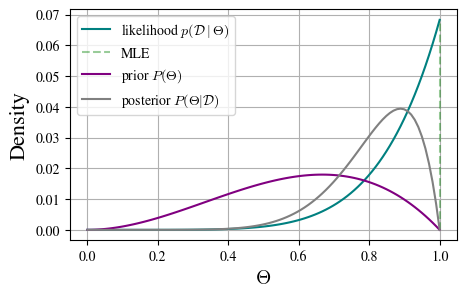

In [128]:
# MAP interactive task  {run: "auto"}

##############################################
# coin tossing
# n number of tosses
# p_H proportion of heads
# h number of heads (this is set by p and n)
# α, β hyperparams for the Beta distribution
##############################################

# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = np.linspace(0, 1, grid_points)

n = 6 #@param {type:"slider", min:1, max:100, step:1}
h = 6 #@param {type:"slider", min:0, max:100, step:1}
α = 3 #@param {type:"slider", min:0, max:10, step:1}
β = 2 #@param {type:"slider", min:0, max:10, step:1}

# compute likelihood at each point in the grid
log_prob_likelihood = stats.binom(n, p=p_grid).logpmf(h)

# normalize likelihood to get the likelihood PMF
likelihood = np.exp(log_prob_likelihood - np.max(log_prob_likelihood)) / np.sum(np.exp(log_prob_likelihood - np.max(log_prob_likelihood)))

# Bayesian
# prior, then normalise
log_prob_prior = stats.beta(α, β).logpdf(p_grid)
prior = np.exp(log_prob_prior - np.max(log_prob_prior)) / np.sum(np.exp(log_prob_prior - np.max(log_prob_prior)))
# posterior, then normalise
log_prob_post = stats.beta(α+h, β+n-h).logpdf(p_grid)
post = np.exp(log_prob_post - np.max(log_prob_post)) / np.sum(np.exp(log_prob_post - np.max(log_prob_post)))

# plotting
fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(p_grid, likelihood, color='teal', label='likelihood $p(\mathcal{D}\mid \Theta)$')
ax.vlines(mle(H=h, N=n), 0, max(likelihood), color='green', label='MLE', linestyle='--', alpha=0.4)
ax.plot(p_grid, prior, label='prior $P(\Theta)$', c='purple')
ax.plot(p_grid, post, label='posterior $P(\Theta | \mathcal{D})$', c='gray')
ax.set_xlabel('$\Theta$', fontsize=14)
ax.set_ylabel('Density', fontsize=16)
ax.legend()
ax.grid(0.3)
plt.show()

Now let's add the MAP estimate. See if you can code it and then test it in the code that follows!

In [ ]:
def map_estimate(H, N, α, β):
  p_map = 0## put your code here! write this in terms of the number of heads (H) and total flips (N)
  return p_map

#### ☑️ **Test your code**

In [ ]:
# Run me to test your code
def map_true():
  correct = False
  if np.round(map_estimate(h, n, α, β), 1) == np.round((h + α - 1)/(n + α + β - 2),1):
    correct = True
  return correct

if map_true() == True:
  print('Correct!')
else:
  print('Hmm, not quite... Note that we round at the first decimal!')


#### 💡 **Answer (Code Task 3)**

In [131]:
def map_estimate(H, N, α, β):
  p_map = (H + α - 1)/(N + α + β - 2) ## put your code here! write this in terms of the number of heads (H) and total flips (N)
  return p_map

 ##### Finally, have a look at the sliders with the MAP estimate included.

 Play with the parameters and see what happens when you replicate the case for which there are 4 heads in a row and 4 trials. Does the answer make more sense? What do $\alpha$ and $\beta$ do?



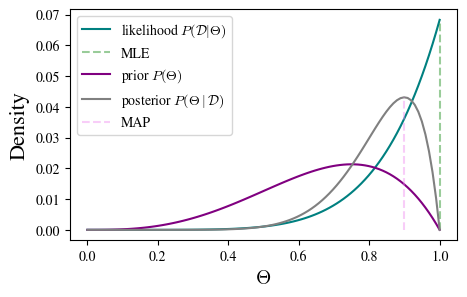

In [132]:
# @title ##MAP interactive task  {run: "auto"}

##############################################
# coin tossing
# n number of tosses
# p_H proportion of heads
# h number of heads (this is set by p and n)
# α, β hyperparams for the Beta distribution
##############################################

# define grid
grid_points=100

# define regular grid in the (0,1) interval
p_grid = np.linspace(0, 1, grid_points)

n = 6 #@param {type:"slider", min:1, max:100, step:1}
h = 6 #@param {type:"slider", min:0, max:100, step:1}
α = 4 #@param {type:"slider", min:0, max:10, step:1}
β = 2 #@param {type:"slider", min:0, max:10, step:1}

# compute likelihood at each point in the grid
likelihood = stats.binom.pmf(h, n, p_grid)/np.sum(stats.binom.pmf(h, n, p_grid))

# Bayesian
# prior, then normalise
log_prob_prior = stats.beta(α, β).logpdf(p_grid)
prior = np.exp(log_prob_prior - np.max(log_prob_prior)) / np.sum(np.exp(log_prob_prior - np.max(log_prob_prior)))
# posterior, then normalise
log_prob_post = stats.beta(α+h, β+n-h).logpdf(p_grid)
post = np.exp(log_prob_post - np.max(log_prob_post)) / np.sum(np.exp(log_prob_post - np.max(log_prob_post)))

fig = plt.figure(dpi=100, figsize=(5, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(p_grid, likelihood,color='teal',label='likelihood $P(\mathcal{D}|\Theta)$')
ax.vlines(mle(H=h, N=n), 0, max(likelihood),color='green',label='MLE',linestyle='--',alpha=0.4)
ax.plot(p_grid, prior, label='prior $P(\Theta)$', c='purple')
ax.plot(p_grid, post, label='posterior $P(\Theta \mid \mathcal{D})$', c='gray')
ax.vlines(map_estimate(H=h, N=n, α=α, β=β),0, max(post), color='violet', linestyle='dashed', alpha=0.4, label='MAP')
ax.set_xlabel('$\Theta$', fontsize=14)
ax.set_ylabel('Density', fontsize=16)
ax.legend()
plt.show()

### **To go a little further: Conjugate <font color='purple'>`priors`</font>**



Note that in the coin flipping example, plotting the distributions is easy because we can actually compute the full <font color='gray'>`posterior`</font> analytically:

\begin{align}
p(\theta \mid H) &=& \frac{p(\theta)p(H\mid \theta)}{p(H)} \\
&=& \frac{\text{Beta}(\theta \mid a,b)\cdot \theta}{p(H)} \\ & \propto& \theta \cdot \text{Beta}(\theta \mid a,b) \\
& \propto & \theta \cdot \theta^{a-1}(1-\theta)^{b-1} = \text{Beta}(\theta \mid a +1, b)
\end{align}

We get another Beta distribution, which we can manipulate and compute easily and exactly! And these allow $\alpha$ and $\beta$ to be interpretable in terms of what we we expect (<font color='purple'>`prior`</font> knowledge) about the number of heads and tails.

This is because we used a <font color='purple'>`prior`</font> from a particular class of probability distributions called the exponential family, which have the special property that doing a "Bayes update" keeps the form of the distribution the same but changes its parameters.

This property is called conjugacy, and <font color='purple'>`priors`</font> with conjugacy are called *conjugate* <font color='purple'>`priors`</font>. Conjugate priors are particularly useful because they allow us to ensure tractable <font color='gray'>`posteriors`</font>, that is posterior distributions that we can compute and work with easily.

_Note: This practical doesn't cover conjugacy and the exponential family in depth, but you should ask your tutor if you want to find out more!_ 😸

### [Optional] Comparing models using MAP

You should probably have noticed that the MAP estimate is very much biased by the prior that we choose. So, how do we know which model of the prior is the best one? Well, we can just use Bayes' Rule again!

After seeing some data, let's decide which model (bent or fair) best fits. We can just directly compare the **evidence** for a model given by
\begin{equation*}
p(\mathcal{D} \mid \mathcal{M}) = \int p(\mathcal{D} \mid \theta_M) p(\theta_M \mid \mathcal{M}) d\theta_M
\end{equation*}

### Analytical derivation of multivariate Gaussian-Gaussian posterior, and sampling




Conjugacy is really useful and neat... When it works! There are lots of times when you won't be able to fit a conjugate prior, as you will see later. There are also lots of times when finding the analytical expression for a conjugate prior's posterior involves pages of maths. For example, check out this derivation of a multivariate Gaussian posterior from a Gaussian conjugate prior and Gaussian likelihood: [Conjugate Analysis for the Multivariate Gaussian](https://https://gregorygundersen.com/blog/2020/11/18/bayesian-mvn/).

And this is considered one of the easier examples... Yikes! 😨

**Group task 14**: If we can't find an analytical solution for the posterior, think about ways we could still approximate the distribution.

#### Sampling

We want ways to work with probabilistic derivations and Bayesian inference/point estimates when we can't find a conjugate posterior.

For this, we move to sampling! This means, considering a distribution that we don't know the exact form of mathematically, but from which we *can simulate many samples*, and taking those samples to in turn "construct" some property... Almost like how one would make a histogram of data. 📊 To start off, you'll see the famous Monte Carlo method. 🙌

## The Monte Carlo method



The Monte Carlo method is a computational technique that uses **<font color='teal'>`random sampling`</font>** to estimate complex mathematical outcomes or solve problems that might be **<font color='teal'>`deterministic`</font>** in nature.



### Monte Carlo integration



Let us consider the example of computing of an integral of a function. This is a deterministic problem, but we will solve it using random sampling.

**Problem to solve:** find value of the integral

$$\int_a^b f(x)dx. $$

Monte Carlo integration estimates this integral by finding the fraction of random points that fall below $f(x)$.

In the **Bayesian inference** context, we are usually interested in estimating expectations (which are themselves point estimates):

$$ E[h(x)] = \int h(x)f(x)dx,$$

which can be done with

$$ \bar{h}_n = \frac{1}{n} \sum_i^n h(x_i),$$
where $x_i ∼ f$ is a draw from the density $f$.

**Exercise:** _Do you see how this is **sampling** to figure out a property?_

The convergence of Monte Carlo integration is $\mathcal{O}(n^{1/2})$ and is independent of the dimensionality. Hence, Monte Carlo integration **generally** beats numerical intergration for moderate- and high-dimensional integration since numerical integration (quadrature) converges as $0(n^d)$!



### Monte Carlo integration - Example



Estimate the integral $\int_0^1 e^x dx$ using Monte Carlo integration.

1.718281828459045
        10 1.630969
       100 1.522238
      1000 1.739700
     10000 1.721216
    100000 1.710071
   1000000 1.716630
  10000000 1.718268
 100000000 1.718416


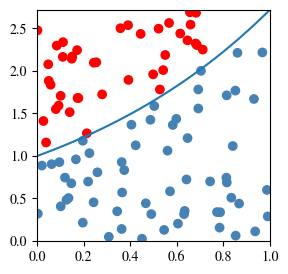

In [133]:
#@title Monte Carlo integration code
print(np.exp(1) - np.exp(0))

plt.figure(figsize=(3, 3))

x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e

cols = ['steelblue'] * 100
for i in range(100):
    if pts[i,1] > np.exp(pts[i,0]):     # acceptance / rejection step
        cols[i] = 'red'


plt.scatter(pts[:, 0], pts[:, 1], c = cols)
plt.xlim([0,1])
plt.ylim([0, np.e])

# Monte Carlo approximation

for n in 10**np.array([1, 2, 3, 4, 5, 6, 7, 8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n
    print('%10d %.6f' % (n, sol))

We can also use Monte Carlo to estimate the value of π!

In [134]:
#@title The Monte Carlo method - computing π

def in_circle(x, y, r):
    # is point (x,y) within circle of radius r?

    return np.sqrt(x **2 + y**2) <= r**2

def approx_pi(r, n):

    xs, ys, cols = [], [], []

    count = 0

    for i in range(n):
        x = np.random.uniform(0,r,1)
        y = np.random.uniform(0,r,1)
        xs.append(x)
        ys.append(y)

        if in_circle(x, y, r):
            count += 1
            cols.append("red")
        else:
            cols.append("steelblue")

    pi_appr = round(4 * count/n, 3)

    plt.figure(figsize=(2, 2))
    plt.scatter(xs, ys, c = cols, s=2)
    plt.title("pi (approximately) = " + str(pi_appr))
    plt.xticks([])
    plt.yticks([])
    plt.show()

    return pi_appr

**Group task Β14.**

Using the functions above, iterate $n$ through vaules $5*10^1, 5*10^2, 5*10^3$ and run the function approximating $\pi$. How does the result change?

In [ ]:
r = 1

for n in 5*10**np.array([1,2,3]):
    approx_pi(r, n)

## Markov Chain Monte Carlo (MCMC) [<font color='green'>`Advanced`</font>]



We want to estimate the posterior distribution, but this is often intractable.

MCMC is a computational technique used to approximate complex probability distributions by generating a **<font color='teal'>`sequence of (correlated) samples`</font>**, where each sample is obtained by iteratively transitioning through a Markov chain with carefully designed transition probabilities.




### How does MCMC work (very rough overview)?



- Draw samples from a (simple) proposal distribution so that each draw depends only on the state of the previous draw (i.e. the samples form a Markov chain).
- Under certain conditions, the Markov chain will have a unique stationary distribution.

- We set up an acceptance criteria for each draw based on comparing successive states with respect to a target distribution that enusre that the stationary distribution is the posterior distribution we are searching for.

- There is no need to evaluate the potentially intractable marginal likelihood.

- After sufficient number of iterations, the Markov chain of accepted draws will converge to the staionary distribution, and we can use those samples as (correlated) draws from the posterior distribution, and find functions of the posterior distribution.

The next optional section demonstrates an example of **<font color='teal'>`Matrolopolis-Hastings`</font>** algorithm - this is an example of MCMC.

## [Optional] Metropolis-Hastings random walk algorithm



- Start with an initial guess for $\theta$

- Chose a new proposed value as $\theta_p = \theta + \delta_\theta, \delta_\theta \sim N(0, \sigma).$
   
  Here we have chosen the proposal distribution to be $N(0, \sigma).$
  
- If $g$ is the posterior probability, calculate the ratio $\rho = \frac{g(\theta_p \mid X)}{g(\theta \mid X)}$

- (adjust for symmetry of the proposal distribution)


- If $\rho \ge 1,$ accept $\theta = \theta_p;$ if $\rho < 1,$ accept  $\theta = \theta_p$ with probability $p,$ otherwise keep $\theta = \theta.$ (This step is done with the help of the standard Uniform distribution)

In [ ]:
#@title Metropolis-Hastings

def target(likelihood, prior, n, h, theta):
    """
    define target distribution
    """
    if theta < 0 or theta > 1:
        return 0
    else:
        return likelihood(n, theta).pmf(h)*prior.pdf(theta)


# number of experiments
n = 100

# number of successes
h = 61

# hyperparameters for the prior
a = 10
b = 10
likelihood = stats.binom
prior = stats.beta(a, b)
sigma = 0.3

# initilisation
naccept = 0
theta = 0.1

# set the number of MCMC iterations
niters = 10000

# run MH
samples = np.zeros(niters+1)
samples[0] = theta

for i in range(niters):
    theta_p = theta + stats.norm(0, sigma).rvs()
    rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
    u = np.random.uniform()
    if u < rho:
        naccept += 1
        theta = theta_p
    samples[i+1] = theta

# analyse MH output
nmcmc = len(samples)//2
print("Portion of accepted steps = " + str(naccept/niters))

post = stats.beta(h+a, n-h+b)
thetas = np.linspace(0, 1, 200)

plt.figure(figsize=(4, 4))
plt.hist(samples[nmcmc:], 20, histtype='step', linewidth=1, label='Distribution of posterior samples', density =True)
plt.hist(prior.rvs(nmcmc), 40, histtype='step',  linewidth=1, label='Distribution of prior samples', density=True)
plt.plot(thetas, post.pdf(thetas), c='red', linestyle='--', alpha=0.5, label='True posterior')
plt.xlim([0,1])
plt.grid(0.3)
plt.legend(loc='best')

We run the chain for $N$ iterations and discard the first $B$ samples. This is called **<font color='purple'>`burn-in`</font>** (or "warm-up").

We can run several parallel versions of the algorithm. Each of them is called a **<font color='green'>`chain`</font>**.

Neigbouring samples will contain similar information. We might want to save only every second, or fifth, or tenth. This is called **<font color='orange'>`thinning`</font>**.

## Convergence diagnostics



Rigorous way of assesing convergence is an unsolved problems. But there are several tool swe can use to convice ourselves that an MCMC has converged, such as

- trace plots need to look stationary
- parallel chains should carry similar information

In [ ]:
#@title Convergence diagnostics

def mh_coin(niters, n, h, theta, likelihood, prior, sigma):
    samples = [theta]
    while len(samples) < niters:
        theta_p = theta + stats.norm(0, sigma).rvs()
        rho = min(1, target(likelihood, prior, n, h, theta_p)/target(likelihood, prior, n, h, theta ))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples.append(theta)

    return samples

n = 100
h = 61
lik = stats.binom
prior = stats.beta(a, b)
sigma = 0.05
niters = 100

chains = [mh_coin(niters, n, h, theta, likelihood, prior, sigma) for theta in np.arange(0.1, 1, 0.2)]

# compare multiple chains

plt.figure(figsize=(5, 4))

for chain in chains:
    plt.plot(chain, '-o')

plt.xlim([0, niters])
plt.ylim([0, 1])